In [1]:
import numpy as np
import pandas as pd
import glob as glob
import seaborn as sns
import matplotlib.pyplot as plt
import tqdm as tqdm
import os

In [2]:
WRK="/workdir/users/pd378/oil_international/args_prevelence/kma_metagenomic_profiling/"
RESULTS=WRK+"kma_results/"
result_list=glob.glob(RESULTS+"*/*.res")
OUT=WRK+"output_files/"

meta=pd.read_csv(OUT+"metadata/curatedMetagenomicData_metadata_v3.2.3.csv")
seq_cols=["study_name","sample_id","body_site","country","non_westernized","sequencing_platform","DNA_extraction_kit",
      "PMID","NCBI_accession","number_reads","number_bases","median_read_length"]
sequencing_data=meta[seq_cols]
meta_cols=["study_name","sample_id","subject_id","body_site","antibiotics_current_use","disease","age","age_category","gender","country","non_westernized"]
sample_data=meta[meta_cols]

honduras_meta=pd.read_csv(OUT+"metadata/honduras_metadata.txt", sep='\t')
sample_data=pd.concat([sample_data, honduras_meta], ignore_index=True)

# curate wieather each sample is healthy or not healthy
condition_list=[]
condition_test=[]
for condition in sample_data["disease"]:
    if condition=="healthy":
        condition_test.append(1)
        condition_list.append("healthy")
    else: 
        condition_test.append(0)
        condition_list.append("not_healthy")
sample_data["condition"]=condition_list
sample_data["healthy_test"]=condition_test 

counry_codes=pd.read_csv(OUT+"metadata/country_code_definitions.txt", sep='\t').drop("non_westernized",axis=1)

card_index=pd.read_csv(OUT+"card_data/aro_index.txt", sep='\t')
selected_gene_fams=pd.read_csv(OUT+"metadata/selected_gene_fams_V1.txt", sep='\t')

/home/pd378/miniconda3/envs/jupyter2/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (21,22,27,29,30,33,43,50,51,52,53,54,55,56,57,63,64,65,70,72,76,77,87,90,98,99,102,106,107,108,109,111,114,115,116,123) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


### Import and combine the results

In [3]:
#initialize data holder

### No longer need to do this, instead import the compiled results
"""
kma_data=pd.DataFrame()
empty_list=[]
for res in tqdm.tqdm(result_list):
    ### parse the study and sample names from the path
    study_sample=res.split("/")[-2].split("_out")[0]
    study=study_sample.split("-",1)[0]
    sample=study_sample.split("-",1)[-1]
    
    ### read the result table
    if os.stat(res).st_size == 0:
        empty_list.append([study_sample,study,sample])
        continue
    this_data=pd.read_csv(res, sep='\t')
    this_data.insert(0, "study_name", study)
    this_data.insert(1, "sample_id", sample)
    
    ### add the result to the final table
    kma_data=pd.concat([kma_data,this_data])

### add in the honduras data
honduras=pd.read_csv(WRK+"honduras_results/all_honduras_kma.res", sep='\t')
honduras.insert(0, "study_name", "Princeton_2022")
all_kma_data=pd.concat([kma_data,honduras])

### save it!
#all_kma_data.to_csv(OUT+"kma_results/all_kma_combined.res", sep='\t')

"""

all_kma_data=pd.read_csv(OUT+"kma_results/all_kma_combined.res", index_col=0)
all_kma_data.head(2)

,study_name,sample_id,#Template,Score,Expected,Template_length,Template_Identity,Template_Coverage,Query_Identity,Query_Coverage,Depth,q_value,p_value
0,PehrssonE_2016,SID010101,gb|AF028812.1|+|392-887|ARO:3002867|dfrF [Ente...,3004,118,495,100.00,100.00,100.00,100.00,6.18,2665.99,1.000000e-26
1,PehrssonE_2016,SID010101,gb|BA000007.3|-|4903688-4905062|ARO:3000830|cp...,411,330,1374,27.15,27.51,98.68,363.49,0.31,8.79,3.000000e-03


In [4]:
all_kma_data[all_kma_data['study_name']=='Princeton_2022'].drop_duplicates('sample_id')

,study_name,sample_id,#Template,Score,Expected,Template_length,Template_Identity,Template_Coverage,Query_Identity,Query_Coverage,Depth,q_value,p_value
0,Princeton_2022,005-0002-05,gb|AF028812.1|+|392-887|ARO:3002867|dfrF [Ente...,7046,739,495,100.00,100.00,100.00,100.00,14.36,5109.50,1.000000e-26
99,Princeton_2022,005-0006-05,gb|GQ343019.1|+|132-1023|ARO:3002999|CblA-1 [m...,803,3018,891,45.23,45.23,100.00,221.09,0.89,1284.05,1.000000e-26
203,Princeton_2022,005-0014-05,gb|GQ343019.1|+|132-1023|ARO:3002999|CblA-1 [m...,1501,2021,891,76.21,76.32,99.85,131.03,1.69,76.85,1.000000e-17
247,Princeton_2022,005-0020-05,gb|AF028812.1|+|392-887|ARO:3002867|dfrF [Ente...,2303,1953,495,99.80,100.20,99.60,99.80,4.72,28.70,8.500000e-08
354,Princeton_2022,005-0022-05,gb|GQ343019.1|+|132-1023|ARO:3002999|CblA-1 [m...,7752,3461,891,99.21,100.00,99.21,100.00,8.94,1642.01,1.000000e-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110789,Princeton_2022,174-0021-05,gb|AF028812.1|+|392-887|ARO:3002867|dfrF [Ente...,22413,1266,495,100.00,100.00,100.00,100.00,45.01,18883.76,1.000000e-26
110887,Princeton_2022,174-0022-05,gb|AF028812.1|+|392-887|ARO:3002867|dfrF [Ente...,20033,1255,495,100.00,100.00,100.00,100.00,40.49,16563.83,1.000000e-26
110996,Princeton_2022,174-0023-05,gb|AF028812.1|+|392-887|ARO:3002867|dfrF [Ente...,5491,772,495,100.00,100.20,99.80,99.80,11.11,3555.04,1.000000e-26
111062,Princeton_2022,174-0025-05,gb|AF028812.1|+|392-887|ARO:3002867|dfrF [Ente...,19435,1064,495,99.80,100.20,99.60,99.80,39.49,16463.63,1.000000e-26


In [4]:
#print(len(kma_data))
#print(len(honduras))
print(len(all_kma_data))

#del kma_data

1009850


### Using CD-Hit to cluster very similar genes together in order to collapse the genes some

In [5]:
### import the clustering map
clust_id="99"
clust_map=pd.read_csv(OUT+"card_data/"+clust_id+"_per_card_clust.fasta.bak.clstr", sep='\t', names=["cluster","hit"])
### parse out the aro numbers and sort the representatives to the top
clust_map["aro"]=clust_map["hit"].str.split("|").str[4]
clust_map["rep"]=clust_map["hit"].str.split("... ").str[-1]
### build a dictionary and map the aro representatives for each aro hit
dict_map=clust_map[clust_map["rep"]=="*"]
map_dict=dict(zip(dict_map["cluster"],dict_map["aro"]))
clust_map['aro_rep'] = clust_map['cluster'].map(map_dict)
clust_map
aro_map=dict(zip(clust_map["aro"],clust_map["aro_rep"]))

In [6]:
card_info=card_index[["ARO Accession","ARO Name","AMR Gene Family","Drug Class","Resistance Mechanism"]]
card_info=card_info.drop_duplicates(["ARO Accession","ARO Name","AMR Gene Family"]) ## there is 5 duplicatte ARO numbers but they are the same and can just be dropped
card_reps=pd.merge(card_info.rename({"ARO Accession":"aro_rep"},axis=1), clust_map[["aro","aro_rep"]], on="aro_rep", how='inner')
#card_reps.to_csv(OUT+"card_data/aro_to_aro_rep_99.txt",sep='\t',index=False)

### Now I'll add the aro_rep to the kma output and then incorporate the gene names and families
* suprised to see that I don't lose many hits after clustering. Maybe not a suprise since KMA is supposed to pick best

In [7]:
all_kma_data.head(2)

,study_name,sample_id,#Template,Score,Expected,Template_length,Template_Identity,Template_Coverage,Query_Identity,Query_Coverage,Depth,q_value,p_value
0,PehrssonE_2016,SID010101,gb|AF028812.1|+|392-887|ARO:3002867|dfrF [Ente...,3004,118,495,100.00,100.00,100.00,100.00,6.18,2665.99,1.000000e-26
1,PehrssonE_2016,SID010101,gb|BA000007.3|-|4903688-4905062|ARO:3000830|cp...,411,330,1374,27.15,27.51,98.68,363.49,0.31,8.79,3.000000e-03


In [8]:
# map the aro representatives to each ARO hit
filter_kma=all_kma_data.copy()
filter_kma["ARO Accession"]=filter_kma["#Template"].str.split("|").str[4]
filter_kma["aro_rep"]=filter_kma["ARO Accession"].map(aro_map)
# remove the ones without an ARO which come from the e-pilli screen
filter_kma=filter_kma[~filter_kma["aro_rep"].isna()]



# Filter the kma results
### Patrick uses min template ID of 75% which seems to remove most the junk on its own
### Also using a maximum p-value but unsure what is a good number. 0.001 for now

min_temp_ID=90
min_temp_cov=80
max_p_val=0.0001


print(str(len(filter_kma))+" starting hits" )
filter_kma=filter_kma[filter_kma["Template_Identity"] >= min_temp_ID]
print(str(len(filter_kma))+" after template ID filtereing" )
filter_kma=filter_kma[filter_kma["Template_Coverage"] >= min_temp_cov]
print(str(len(filter_kma))+" after template coverage filtering" )
filter_kma=filter_kma[filter_kma["p_value"] <= max_p_val]
print(str(len(filter_kma))+" after p-value filtering" )

filter_kma.head(2)

1009706 starting hits
476183 after template ID filtereing
476183 after template coverage filtering
473381 after p-value filtering


,study_name,sample_id,#Template,Score,Expected,Template_length,Template_Identity,Template_Coverage,Query_Identity,Query_Coverage,Depth,q_value,p_value,ARO Accession,aro_rep
0,PehrssonE_2016,SID010101,gb|AF028812.1|+|392-887|ARO:3002867|dfrF [Ente...,3004,118,495,100.00,100.0,100.00,100.0,6.18,2665.99,1.000000e-26,ARO:3002867,ARO:3002867
4,PehrssonE_2016,SID010101,gb|GQ342996.1|+|797-1793|ARO:3003097|CfxA6 [un...,30627,232,996,95.68,100.0,95.68,100.0,36.65,29935.90,1.000000e-26,ARO:3003097,ARO:3003097


In [9]:
# collapse the results based on the CD-Hit clustering
collapse_kma_data=filter_kma.copy()
# sort values so the best hits are on the top based on score
collapse_kma_data=collapse_kma_data.sort_values("Score", ascending=False)
print(str(len(collapse_kma_data))+" before cluster filtering")
collapse_kma_data=collapse_kma_data.drop_duplicates(["study_name","sample_id","aro_rep"])
print(str(len(collapse_kma_data))+" after cluster filtering")
collapse_kma_data=collapse_kma_data.drop(["#Template","ARO Accession"], axis=1).rename({"aro_rep":"ARO Accession"}, axis=1)

### now add further informatino from CARD to the results
card_info=card_index[["ARO Accession","ARO Name","AMR Gene Family","Drug Class","Resistance Mechanism"]]
card_info=card_info.drop_duplicates(["ARO Accession","ARO Name","AMR Gene Family"]) ## there is 5 duplicatte ARO numbers but they are the same and can just be dropped
collapse_kma_data=pd.merge(collapse_kma_data, card_info, on="ARO Accession", how='inner')
#collapse_kma_data.to_csv(OUT+"kma_results/clustered_"+clust_id+"_kma.res", sep='\t')
print(str(len(collapse_kma_data))+" after addign CARD info")
collapse_kma_data.head(3)

473381 before cluster filtering
473039 after cluster filtering
473039 after addign CARD info


,study_name,sample_id,Score,Expected,Template_length,Template_Identity,Template_Coverage,Query_Identity,Query_Coverage,Depth,q_value,p_value,ARO Accession,ARO Name,AMR Gene Family,Drug Class,Resistance Mechanism
0,OhJ_2014,MET0006,61971361,1109,1380,100.0,100.0,100.0,100.0,45797.82,61968033.52,1.000000e-26,ARO:3000178,tet(K),major facilitator superfamily (MFS) antibiotic...,tetracycline antibiotic,antibiotic efflux
1,OhJ_2014,MET0142,14320730,10781,1380,100.0,100.0,100.0,100.0,10589.66,14288419.37,1.000000e-26,ARO:3000178,tet(K),major facilitator superfamily (MFS) antibiotic...,tetracycline antibiotic,antibiotic efflux
2,WampachL_2018,V2_C101,6351895,12821,1380,100.0,100.0,100.0,100.0,4610.39,6313534.06,1.000000e-26,ARO:3000178,tet(K),major facilitator superfamily (MFS) antibiotic...,tetracycline antibiotic,antibiotic efflux


## Now I have hits per sample clustered
* Assuming I've filtered properly, I can drop all the KMA output and build gene family profiles for each sample
* First I'll do all families, and then I'll reduce down to just the ones I'm interested in

In [10]:
sample_family_profiles=collapse_kma_data[["study_name","sample_id","AMR Gene Family"]].drop_duplicates()
print(len(sample_family_profiles))
sample_family_profiles=pd.merge(sample_family_profiles, sample_data, on=["study_name","sample_id"], how='inner')
print(len(sample_family_profiles))
sample_family_profiles["country"]=sample_family_profiles["country"].str.strip()
sample_family_profiles=pd.merge(sample_family_profiles, counry_codes, on=["country"], how='inner')
print(len(sample_family_profiles))
#sample_family_profiles.to_csv(OUT+"arg_profiles/clustered_"+clust_id+"_sample_family_profiles.txt", sep='\t')
sample_family_profiles.head(3)

214322
211510
211510


,study_name,sample_id,AMR Gene Family,subject_id,body_site,antibiotics_current_use,disease,age,age_category,gender,country,non_westernized,study_condition,condition,healthy_test,full_country,continent,sub_region,sub_sub_region
0,OhJ_2014,MET0006,major facilitator superfamily (MFS) antibiotic...,HV04,skin,NaN,healthy,NaN,adult,female,USA,no,NaN,healthy,1,United States of America,Americas,North America,Northern America
1,OhJ_2014,MET0006,Erm 23S ribosomal RNA methyltransferase,HV04,skin,NaN,healthy,NaN,adult,female,USA,no,NaN,healthy,1,United States of America,Americas,North America,Northern America
2,OhJ_2014,MET0006,msr-type ABC-F protein,HV04,skin,NaN,healthy,NaN,adult,female,USA,no,NaN,healthy,1,United States of America,Americas,North America,Northern America


## Build country and body site profiles now
* 33 countries
* 3 body sites
* 15,013 total metagenoms: 14,479 stool, 256 oral, 278 skin

In [99]:
screened_samples=all_kma_data["sample_id"].drop_duplicates().to_list()
screened_sample_data=sample_data[sample_data["sample_id"].isin(screened_samples)]
screened_sample_data=pd.merge(screened_sample_data, counry_codes, on=["country"], how='inner')
samples_no_genes = screened_sample_data[~screened_sample_data['sample_id'].isin(list(sample_family_profiles['sample_id'].drop_duplicates()))]
samples_no_genes.to_csv(OUT+"arg_profiles/samples_without_AMR.txt", sep='\t')
print(len(sample_data))
print(len(screened_sample_data))

22175
15013


In [13]:
# compile statistics about the number of samples representing different groups
def group_and_count(df, groupings, name):
    return df.groupby(groupings).size().reset_index(name=name)

# count the total samples per country, only looking at stool for the by-country analysis
country_totals=group_and_count(screened_sample_data[screened_sample_data["body_site"]=="stool"], ["full_country","continent"], "total_country")
# count how many are healthy and combine with the totals
country_healthy=screened_sample_data[screened_sample_data["body_site"]=="stool"].groupby(["full_country","continent"])["healthy_test"].sum().reset_index(name="total_healthy")
country_totals=pd.merge(left=country_totals, right=country_healthy, on=["full_country","continent"])
country_totals["percent_healthy"]=100*country_totals["total_healthy"]/country_totals["total_country"]
country_totals["percent_unhealthy"]=100-country_totals["percent_healthy"]
country_totals=country_totals.sort_values(["continent","full_country"])
# filter out cpountries with less than 10 samples
country_totals=country_totals[country_totals["total_country"]>=10]



# do generally the same thing but for the body site grouping
body_site_totals=group_and_count(screened_sample_data, ["body_site"], "total_body_site")
body_site_healthy=screened_sample_data.groupby("body_site")["healthy_test"].sum().reset_index(name="total_healthy")
body_site_totals=pd.merge(left=body_site_totals, right=body_site_healthy, on="body_site")
body_site_totals["percent_healthy"]=100*body_site_totals["total_healthy"]/body_site_totals["total_body_site"]
body_site_totals["percent_unhealthy"]=100-body_site_totals["percent_healthy"]

country_totals

,full_country,continent,total_country,total_healthy,percent_healthy,percent_unhealthy
2,Cameroon,Africa,232,143,61.637931,38.362069
8,Ethiopia,Africa,50,50,100.000000,0.000000
13,Ghana,Africa,44,44,100.000000,0.000000
25,Madagascar,Africa,110,110,100.000000,0.000000
35,Tanzania,Africa,106,106,100.000000,0.000000
3,Canada,Americas,295,244,82.711864,17.288136
6,El Salvador,Americas,99,99,100.000000,0.000000
14,Honduras,Americas,1191,505,42.401343,57.598657
29,Peru,Americas,58,58,100.000000,0.000000
37,United States of America,Americas,2116,1272,60.113422,39.886578


In [87]:
body_site_totals

,body_site,total_body_site,total_healthy,percent_healthy,percent_unhealthy
0,oralcavity,256,195,76.171875,23.828125
1,skin,278,230,82.733813,17.266187
2,stool,14479,10756,74.286898,25.713102


### Make a heatmap for all the beta-lactamases and also all the other gene families that passed filtering

In [41]:
all_gene_fams=pd.read_csv(OUT+"metadata/all_gene_fam_goups_v1.txt", sep='\t')

### First the beta-lactamases
# dropping duplicate gene families in the same samples
gene_family_profile=sample_family_profiles.drop_duplicates(["sample_id","AMR Gene Family"])
# For the country analysis I'm, only going to look at the stool samples
stool_only_profile=gene_family_profile[gene_family_profile["body_site"]=="stool"]
# now do a bunch to count detections per country
country_profile=group_and_count(stool_only_profile, ["full_country","continent","AMR Gene Family"], "country_count")
country_profile=pd.merge(left=country_profile, right=country_totals, on=["full_country","continent"], how='left')
country_profile["percent_country"]=100*country_profile["country_count"]/country_profile["total_country"]

meta_profiles=pd.merge(country_profile, all_gene_fams, on='AMR Gene Family', how='inner')
bl_only=meta_profiles[meta_profiles["Antibioitic Types"]=='beta-lactams']
bl_map=bl_only.pivot_table(index=["continent","full_country"], columns=["grouped_family","display_name"], values="percent_country").fillna(0)
bl_map=bl_map.T.sort_index(axis=1, key=lambda col: col.str.lower())
bl_map=bl_map.T.sort_index(axis=1, key=lambda col: col.str.lower())
bl_map=bl_map.T.droplevel(0)
bl_map=bl_map.T.droplevel(0)

In [86]:
country_profile

,full_country,continent,AMR Gene Family,country_count,total_country,total_healthy,percent_healthy,percent_unhealthy,percent_country
0,Austria,Europe,16S rRNA methyltransferase (G1405),7,154.0,16.0,10.389610,89.610390,4.545455
1,Austria,Europe,AAC(3),1,154.0,16.0,10.389610,89.610390,0.649351
2,Austria,Europe,AAC(6'),20,154.0,16.0,10.389610,89.610390,12.987013
3,Austria,Europe,AAC(6');APH(2''),23,154.0,16.0,10.389610,89.610390,14.935065
4,Austria,Europe,ACC beta-lactamase,2,154.0,16.0,10.389610,89.610390,1.298701
...,...,...,...,...,...,...,...,...,...
2204,United States of America,Americas,tetracycline inactivation enzyme,828,2116.0,1272.0,60.113422,39.886578,39.130435
2205,United States of America,Americas,tetracycline-resistant ribosomal protection pr...,1846,2116.0,1272.0,60.113422,39.886578,87.240076
2206,United States of America,Americas,trimethoprim resistant dihydrofolate reductase...,1424,2116.0,1272.0,60.113422,39.886578,67.296786
2207,United States of America,Americas,undecaprenyl pyrophosphate related proteins,455,2116.0,1272.0,60.113422,39.886578,21.502836


In [42]:
## Also build a plot to show the type of antibioitcs that each gene family can target
from matplotlib.patches import Circle
ab_types=['carbapenem','cephalosporin','penam','monobactam','cephamycin']
ab_resist_typs=all_gene_fams[['display_name','antibioitc_classes']].set_index('display_name')
# empty df used to intialize a blank heatmap
beta_class=pd.DataFrame(columns=bl_map.columns, index=ab_types).fillna(0)

pos_coords=[]
for i, disp_name in enumerate(list(bl_map.columns)):
    these_abs=ab_resist_typs.loc[disp_name]["antibioitc_classes"].split(',')
    these_abs=[i.strip() for i in these_abs]
    for j, ab in enumerate(ab_types):
            if ab in these_abs:
                pos_coords.append((i+.5,j+.5))
#sns.heatmap(beta_class, cmap="vlag",linewidth=1, linecolor='black', square=True)

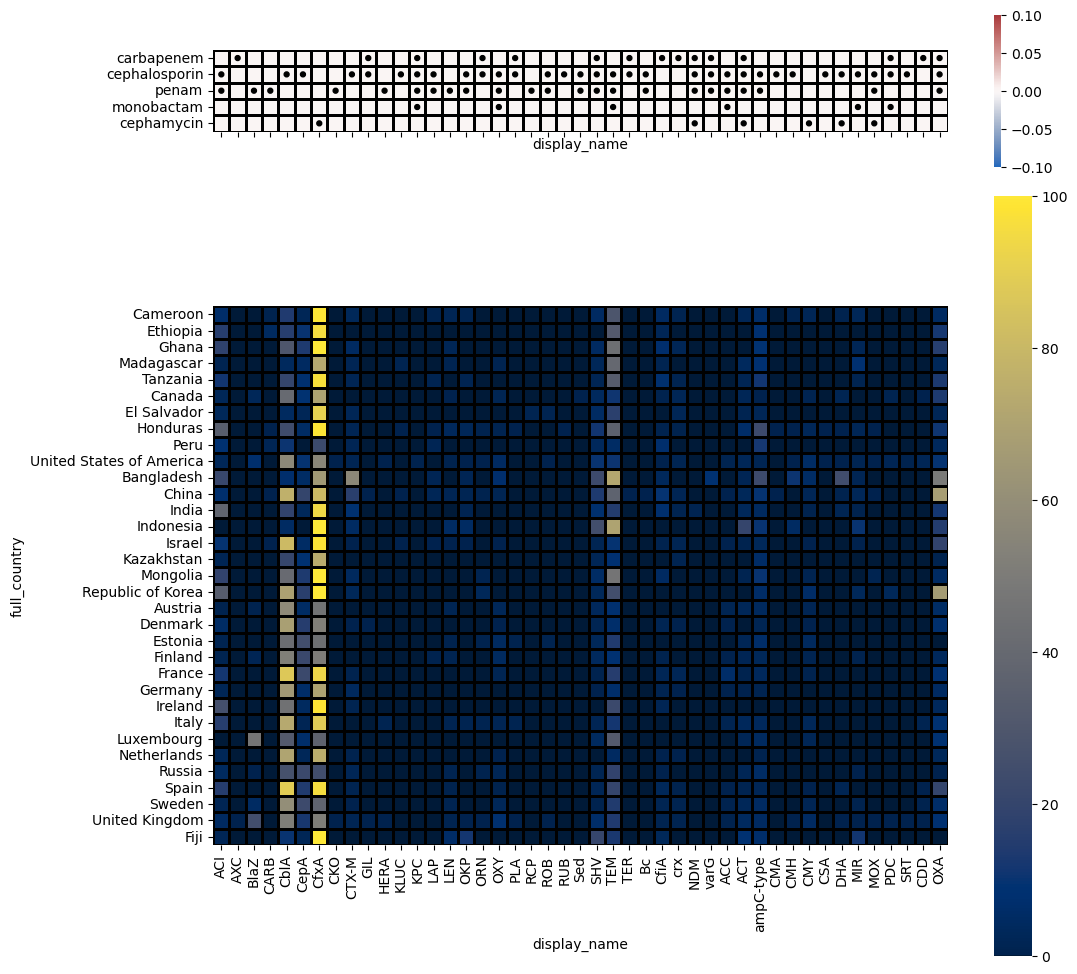

In [43]:
fig, ax = plt.subplots(2, figsize=(10,10), sharex=True, gridspec_kw={'height_ratios': [2,10]})
plt.rcParams['svg.fonttype'] = 'none'
plt.tight_layout()
import matplotlib.colors
cmap_colors=sns.color_palette("cividis", n_colors=10000)
cmap_colors=[[0,.1,.22]]+list(cmap_colors)
custom_map=matplotlib.colors.ListedColormap(cmap_colors, name='cividis_black')

sns.heatmap(bl_map, cmap=custom_map, linewidth=1, linecolor='black', square=True, ax=ax[1])
sns.heatmap(beta_class, cmap="vlag",linewidth=1, linecolor='black', square=True, ax=ax[0])
for coord in pos_coords: 
    ax[0].add_patch(Circle(coord, radius=0.15, color='black'))#, 1, 1, fill=False, edgecolor=edge_colors[3], lw=2))

#plt.savefig(OUT+"figures/heatmaps/all_beta_lactamase.svg")
#plt.savefig(OUT+"figures/heatmaps/all_beta_lactamase.png")
#beta_class.to_csv(OUT+"figures/heatmaps/all_beta_lactamase.txt",sep='\t')

In [44]:
all_gene_fams=pd.read_csv(OUT+"metadata/all_gene_fam_goups_v1.txt", sep='\t')

### Now do everything that's not a beta-lactamse
# now do a bunch to count detections per country
the_rest=meta_profiles[meta_profiles["Antibioitic Types"]!='beta-lactams']
rest_map=the_rest.pivot_table(index=["continent","full_country"], columns=["Grouping","grouped_family","display_name"], values="percent_country").fillna(0)
rest_map=rest_map.T.sort_index(axis=1, key=lambda col: col.str.lower())
rest_map=rest_map.T.sort_index(axis=1, key=lambda col: col.str.lower())
rest_map=rest_map.T.droplevel([0,1],axis=0)
rest_map=rest_map.T.droplevel(0)

<AxesSubplot:xlabel='display_name', ylabel='full_country'>

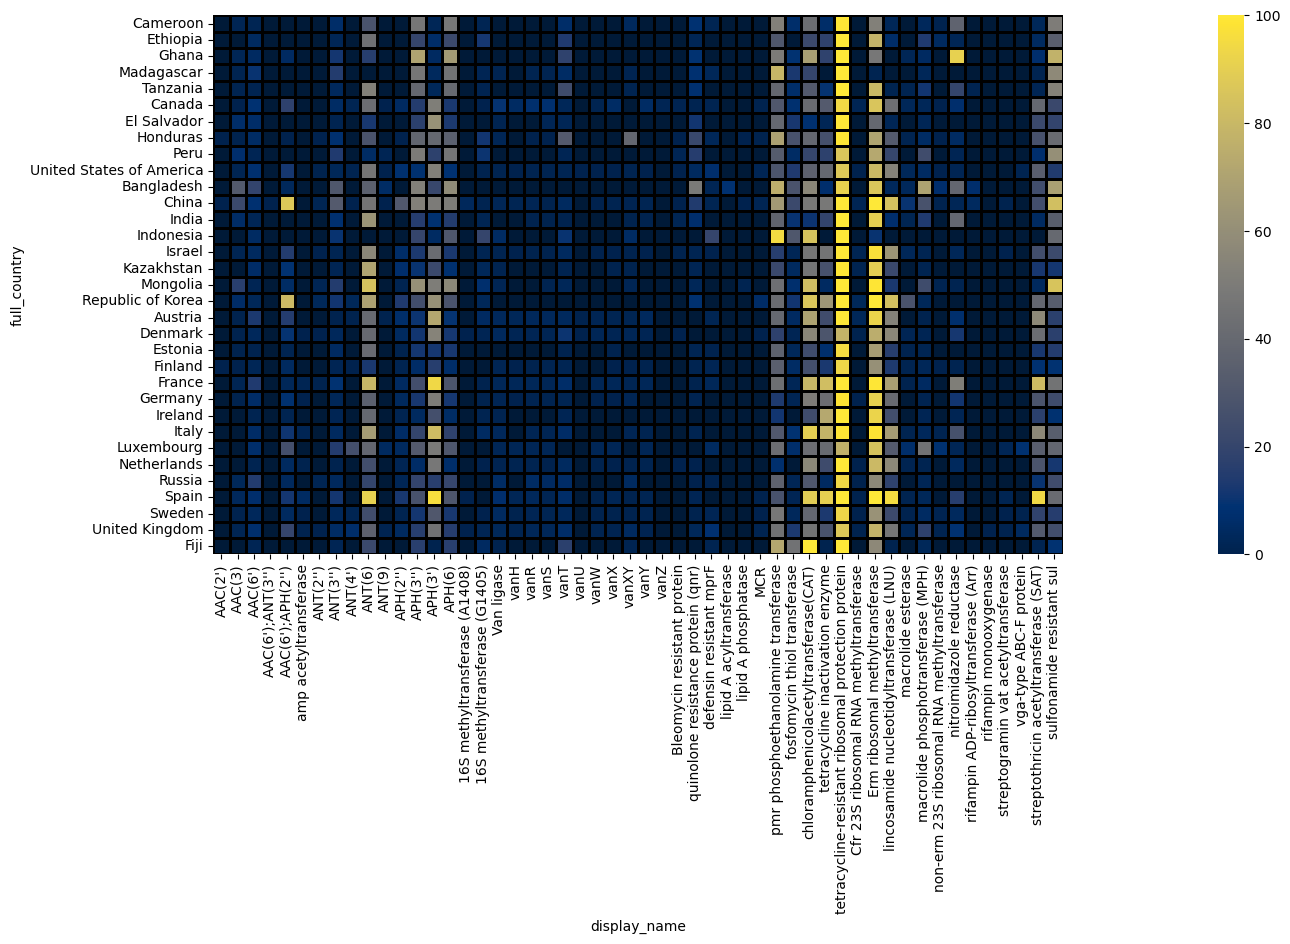

In [45]:
import matplotlib.colors

fig, ax = plt.subplots(figsize=(40,7), sharey='row')
plt.rcParams['svg.fonttype'] = 'none'
#plt.tight_layout()


cmap_colors=sns.color_palette("cividis", n_colors=10000)
cmap_colors=[[0,.1,.22]]+list(cmap_colors)
custom_map=matplotlib.colors.ListedColormap(cmap_colors, name='cividis_black')
sns.heatmap(rest_map, cmap=custom_map, linewidth=1, linecolor='black', square=True)
#plt.savefig(OUT+"figures/heatmaps/not_beta_lactamase.svg")
#plt.savefig(OUT+"figures/heatmaps/not_beta_lactamase.png")
#rest_map.to_csv(OUT+"figures/heatmaps/not_beta_lactamase.txt",sep='\t')

<AxesSubplot:xlabel='AMR Gene Family', ylabel='full_country'>

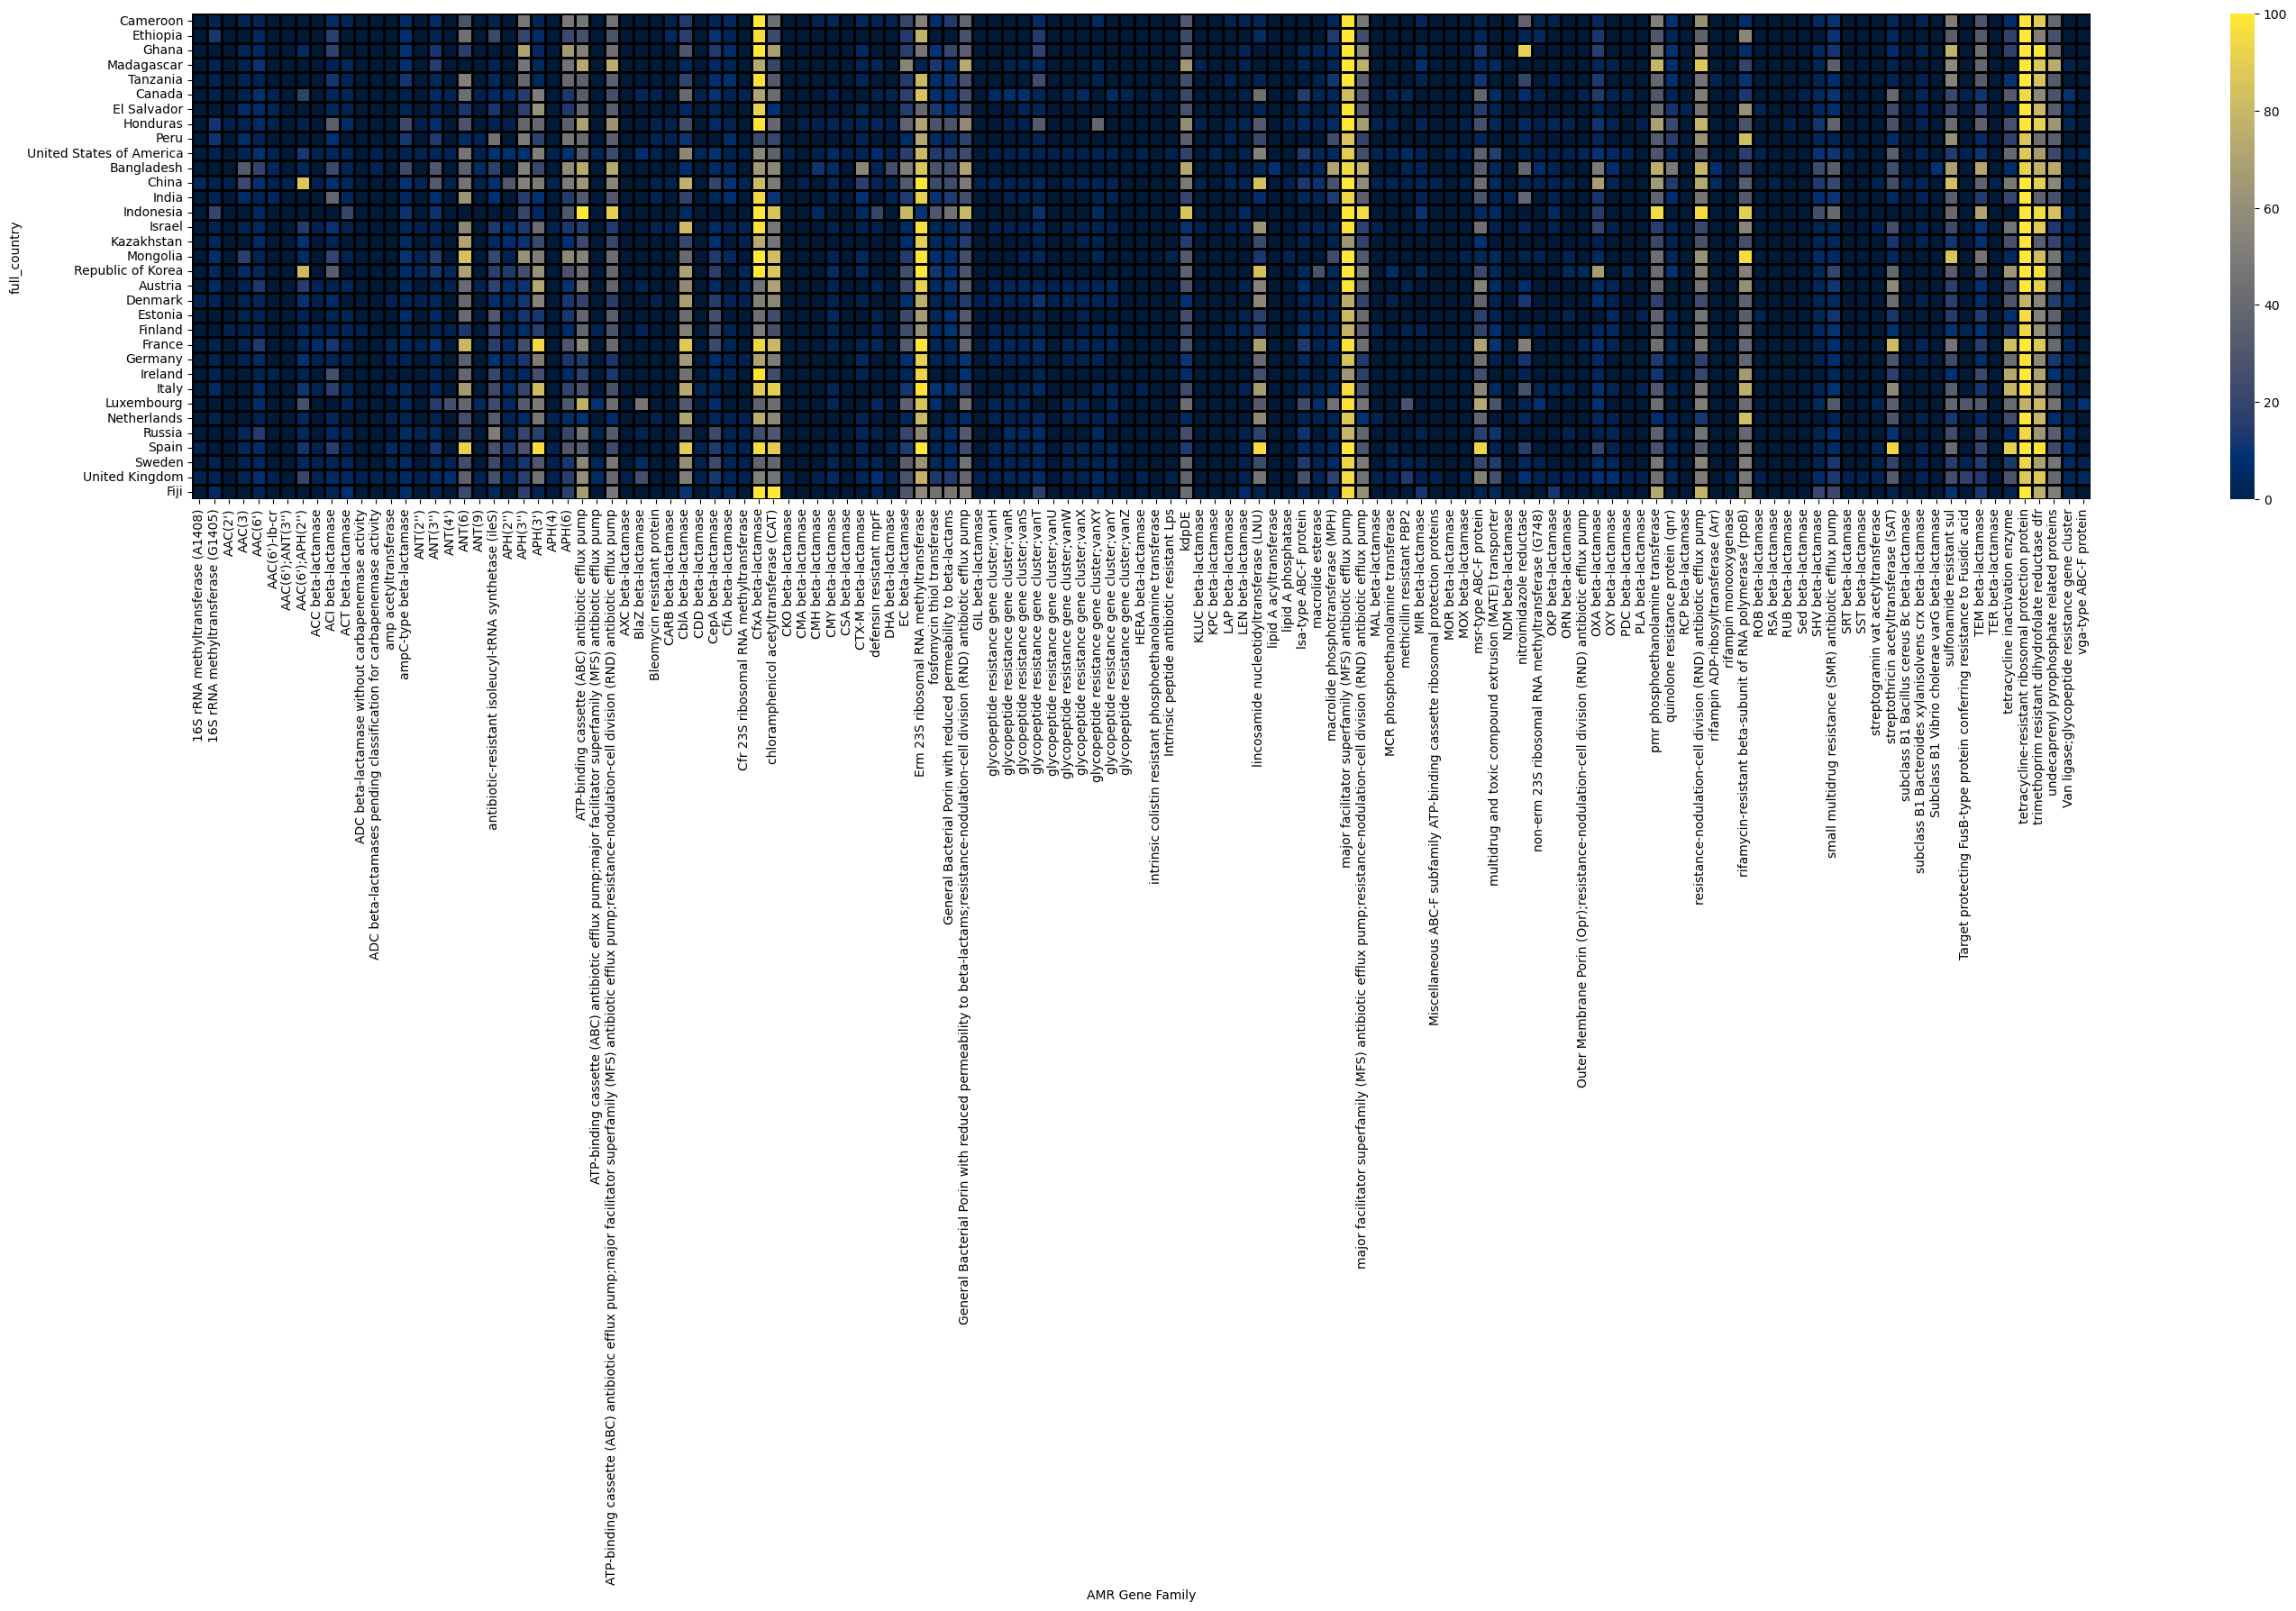

In [55]:
### Code for making heatmap without filtering the selected genes

# dropping duplicate gene families in the same samples
gene_family_profile=sample_family_profiles.drop_duplicates(["sample_id","AMR Gene Family"])
# For the country analysis I'm, only going to look at the stool samples
stool_only_profile=gene_family_profile[gene_family_profile["body_site"]=="stool"]
# now do a bunch to count detections per country
country_profile=group_and_count(stool_only_profile, ["full_country","continent","AMR Gene Family"], "country_count")
country_profile=pd.merge(left=country_profile, right=country_totals, on=["full_country","continent"], how='left')
country_profile["percent_country"]=100*country_profile["country_count"]/country_profile["total_country"]
country_map=country_profile.pivot_table(index=["continent","full_country"], columns=["AMR Gene Family"], values="percent_country").fillna(0)
#country_profile.to_csv(OUT+"arg_profiles/country_gene_family_profiles.txt", sep='\t')
country_map.head(2)

country_map=country_map.sort_index(axis=1, key=lambda col: col.str.lower())

import matplotlib.colors

fig, ax = plt.subplots(figsize=(40,7), sharey='row')
plt.rcParams['svg.fonttype'] = 'none'
#plt.tight_layout()

# bars showing proportion pathogens
y_ticks = country_totals["full_country"]
y_tick_pos = [i + 0.5 for i in range(len(y_ticks))]
color=['#89023E','#1985A1']
#ax[1].barh(y_tick_pos, bar_data["hundo"], height=0.9, align='center', color=color[1])
#ax[1].barh(y_tick_pos, 100, height=0.9, align='center', color=color[1])
#ax[1].barh(y_tick_pos, country_totals["percent_unhealthy"], height=0.9, color=color[0])
#ax[1].set_yticks(y_tick_pos)

# bars showing total isolates
c=['#988395','#82607D','#79B791','#C17767','#9A8C98']
#ax[2].barh(y_tick_pos, country_totals["total_country"], align='center', color=c[1])
#ax[2].set_yticks(y_tick_pos)
#ax[2].set_xscale('log')   
#ax[2].set_xticks([10,100,1000])

cmap_colors=sns.color_palette("cividis", n_colors=10000)
cmap_colors=[[0,.1,.22]]+list(cmap_colors)
custom_map=matplotlib.colors.ListedColormap(cmap_colors, name='cividis_black')
#heatmap
sns.heatmap(country_map.droplevel(0), cmap=custom_map, linewidth=1, linecolor='black', square=True)
#plt.savefig(OUT+"figures/heatmaps/all_gene_fams_id90_cov80_p.0001.svg")
#plt.savefig(OUT+"figures/heatmaps/all_gene_fams_id90_cov80_p.0001.png")
#country_map.to_csv(OUT+"figures/heatmaps/all_gene_fams_id90_cov80_p.0001.txt",sep='\t')

<AxesSubplot:ylabel='Count'>

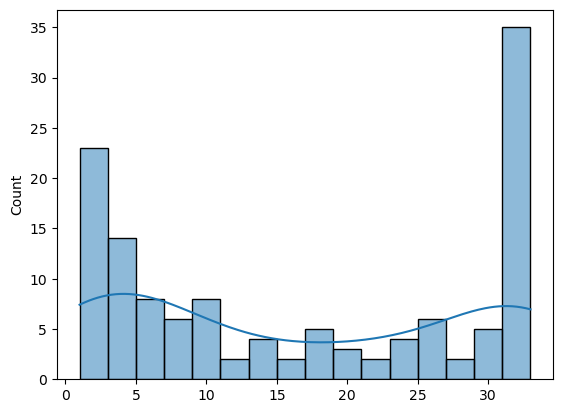

In [56]:
all_count_map=country_map.copy()
all_count_map[all_count_map > 0] = 1
sns.histplot(all_count_map.sum(), binwidth=2, kde=True)

In [59]:
selected_gene_fams=pd.read_csv(OUT+"metadata/selected_gene_fams_V1.txt", sep='\t')
# dropping duplicate gene families in the same samples
gene_family_profile=sample_family_profiles.drop_duplicates(["sample_id","AMR Gene Family"])
# For the country analysis I'm, only going to look at the stool samples
stool_only_profile=gene_family_profile[gene_family_profile["body_site"]=="stool"]
# now do a bunch to count detections per country
country_profile=group_and_count(stool_only_profile, ["full_country","continent","AMR Gene Family"], "country_count")
country_profile=pd.merge(left=country_profile, right=country_totals, on=["full_country","continent"], how='left')
country_profile["percent_country"]=100*country_profile["country_count"]/country_profile["total_country"]
#country_profile.to_csv(OUT+"arg_profiles/country_gene_family_profiles.txt", sep='\t')
country_map=pd.merge(country_profile, selected_gene_fams, on=["AMR Gene Family"], how='inner')
country_map=country_map.pivot_table(index=["continent","full_country"], columns=["Grouping","grouped_family","display_name"], values="percent_country").fillna(0)

country_map["A","Class B1 metallo-beta-lactamase","VIM"]=0
country_map["A","Class B1 metallo-beta-lactamase","IMP"]=0

country_map=country_map.sort_index(axis=1, key=lambda col: col.str.lower())
country_map=country_map.droplevel([0,1], axis=1)

<AxesSubplot:xlabel='display_name', ylabel='full_country'>

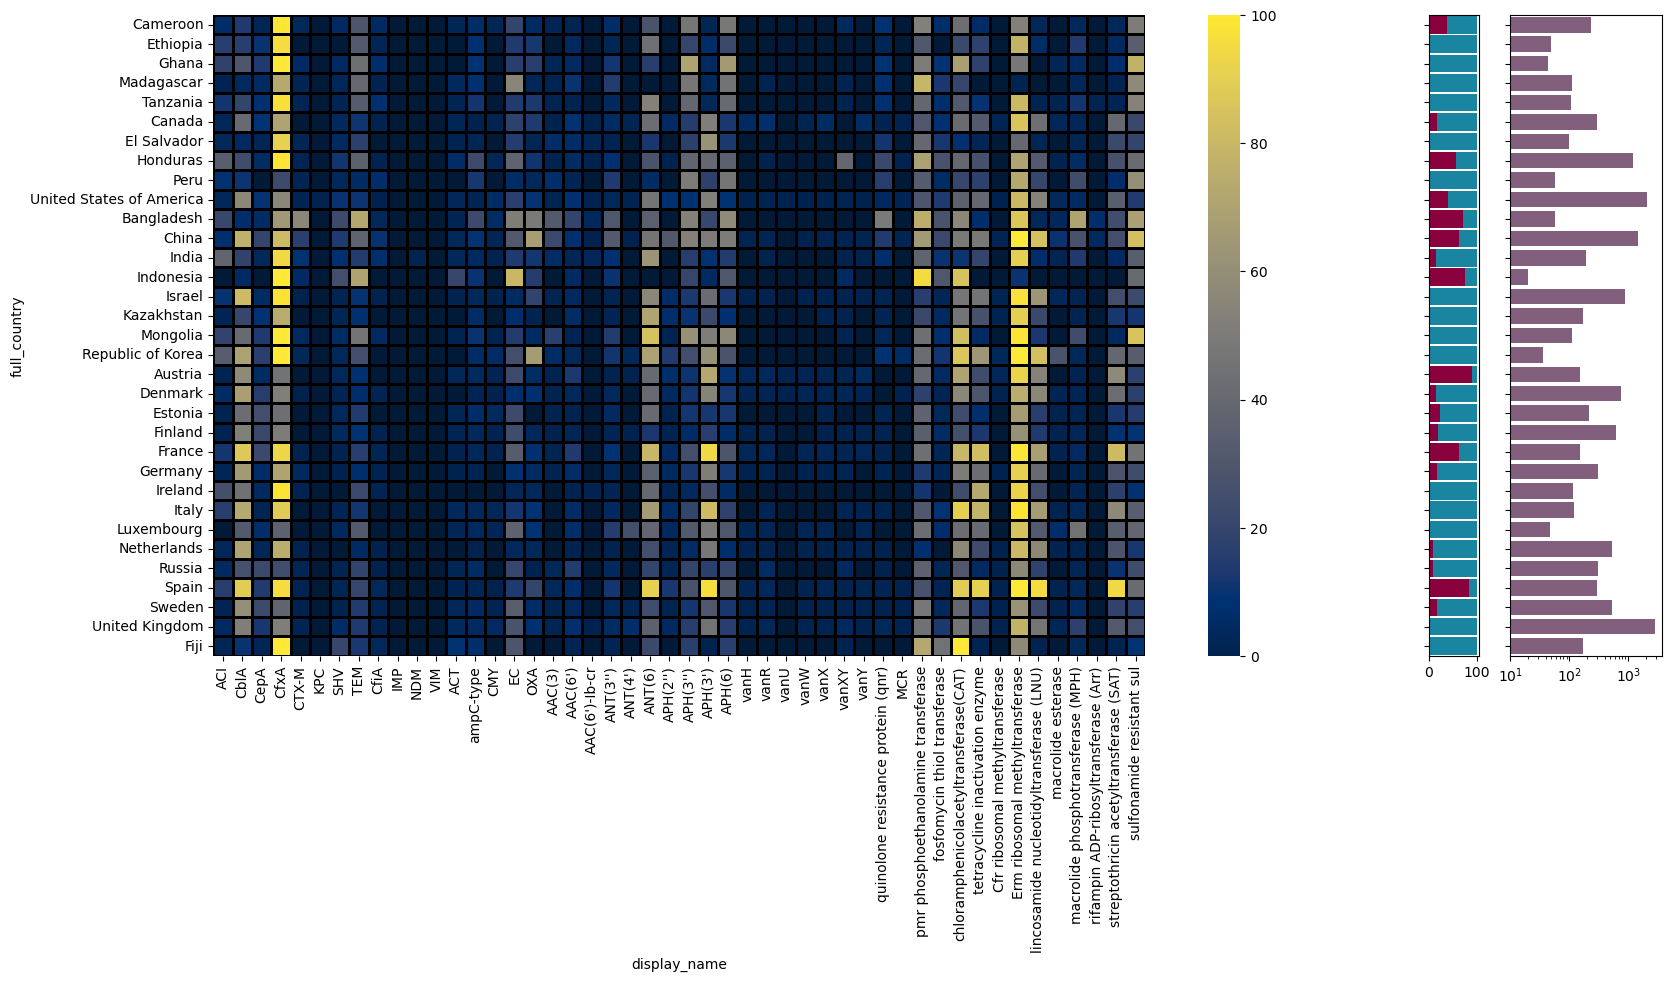

In [60]:
import matplotlib.colors

fig, ax = plt.subplots(1,3, figsize=(16,7), sharey='row', gridspec_kw={'width_ratios': [10,0.4,1.2]})
plt.rcParams['svg.fonttype'] = 'none'
plt.tight_layout()

# bars showing proportion pathogens
y_ticks = country_totals["full_country"]
y_tick_pos = [i + 0.5 for i in range(len(y_ticks))]
color=['#89023E','#1985A1']
#ax[1].barh(y_tick_pos, bar_data["hundo"], height=0.9, align='center', color=color[1])
ax[1].barh(y_tick_pos, 100, height=0.9, align='center', color=color[1])
ax[1].barh(y_tick_pos, country_totals["percent_unhealthy"], height=0.9, color=color[0])
ax[1].set_yticks(y_tick_pos)

# bars showing total isolates
c=['#988395','#82607D','#79B791','#C17767','#9A8C98']
ax[2].barh(y_tick_pos, country_totals["total_country"], align='center', color=c[1])
ax[2].set_yticks(y_tick_pos)
ax[2].set_xscale('log')   
ax[2].set_xticks([10,100,1000])

cmap_colors=sns.color_palette("cividis", n_colors=10000)
cmap_colors=[[0,.1,.22]]+list(cmap_colors)
custom_map=matplotlib.colors.ListedColormap(cmap_colors, name='cividis_black')
#heatmap
sns.heatmap(country_map.droplevel(0), cmap=custom_map, linewidth=1, linecolor='black', ax=ax[0], square=True)

#plt.savefig(OUT+"figures/heatmaps/select_gene_fams_id90_cov80_p.0001.svg")
#plt.savefig(OUT+"figures/heatmaps/select_gene_fams_id90_cov80_p.0001.png")
#country_map.to_csv(OUT+"figures/heatmaps/select_gene_fams_id90_cov80_p.0001.txt",sep='\t')

<AxesSubplot:ylabel='Count'>

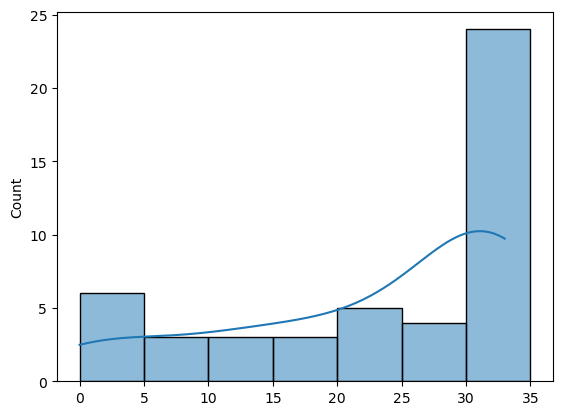

In [66]:
select_country_map = country_map.copy()
select_country_map[select_country_map > 0] = 1
sns.histplot(select_country_map.sum(), binwidth=5, kde=True)

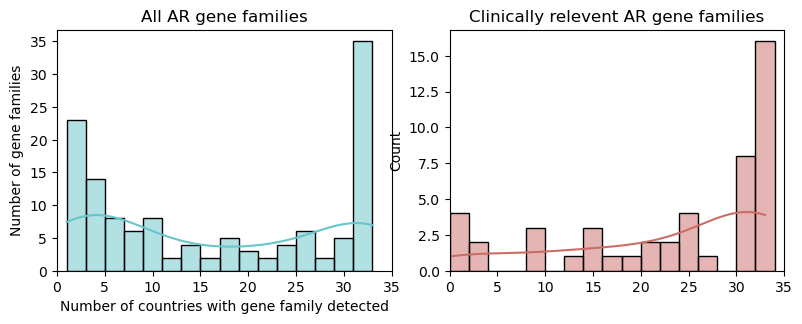

In [84]:
fig, ax = plt.subplots(1,2, figsize=(8,3))
plt.rcParams['svg.fonttype'] = 'none'
plt.tight_layout()

sns.histplot(all_count_map.sum(), binwidth=2, kde=True, ax=ax[0], color='#67C5CB').set_title('All AR gene families')
sns.histplot(select_country_map.sum(), binwidth=2, kde=True, ax=ax[1], color='#CB6D67').set_title('Clinically relevent AR gene families')
ax[0].set_ylabel('Number of gene families')
ax[0].set_xlabel('Number of countries with gene family detected')
ax[0].set_xlim(0,35)
ax[1].set_xlim(0,35)
plt.savefig(OUT+"figures/heatmaps/histogram_gene_fam_country_count.svg")

In [22]:
select_plus=pd.concat([selected_gene_fams, all_gene_fams[all_gene_fams["AMR Gene Family"]=='tetracycline-resistant ribosomal protection protein']])
select_plus.head(2)

,AMR Gene Family,display_name,Resistance Mechanism,grouped_family,Antibioitic Types,Grouping,mechansim_and_beta_lactams,scatter_groups,antibioitc_classes
0,AAC(3),AAC(3),antibiotic inactivation,aminoglycoside acetyltransferase,aminoglycosides,B,antibiotic inactivation,aminoglycosides,NaN
1,AAC(6'),AAC(6'),antibiotic inactivation,aminoglycoside acetyltransferase,aminoglycosides,B,antibiotic inactivation,aminoglycosides,NaN


In [23]:

body_profile=group_and_count(gene_family_profile, ["body_site","AMR Gene Family"], "body_site_count")
body_profile=pd.merge(left=body_profile, right=body_site_totals, on=["body_site"], how='left')
body_profile["percent_body_site"]=100*body_profile["body_site_count"]/body_profile["total_body_site"]
body_profile.to_csv(OUT+"arg_profiles/body_site_gene_family_profiles.txt", sep='\t')
body_profile=body_profile.sort_values("body_site", ascending=False)
body_map=pd.merge(body_profile, select_plus, on=["AMR Gene Family"], how='inner')
body_map=body_map.pivot_table(index=["body_site"], columns=["Grouping","grouped_family","display_name"], values="percent_body_site").fillna(0)

body_map["A","Class B1 metallo-beta-lactamase","VIM"]=0
body_map["A","Class B1 metallo-beta-lactamase","IMP"]=0

body_map=body_map.sort_index(axis=1, key=lambda col: col.str.lower())
body_map=body_map.droplevel([0,1], axis=1)
reordered=["stool", "oralcavity", "skin"]
body_map=body_map.reindex(reordered)
body_site_totals=body_site_totals.reindex([2,0,1])

body_map

display_name,ACI,CblA,CepA,CfxA,CTX-M,KPC,SHV,TEM,CfiA,IMP,...,tetracycline-resistant ribosomal protection protein,tetracycline inactivation enzyme,Cfr ribosomal methyltransferase,Erm ribosomal methyltransferase,lincosamide nucleotidyltransferase (LNU),macrolide esterase,macrolide phosphotransferase (MPH),rifampin ADP-ribosyltransferase (Arr),streptothricin acetyltransferase (SAT),sulfonamide resistant sul
body_site,,,,,,,,,,,,,,,,,,,,,
stool,8.053042,53.290973,11.672077,67.960495,3.094136,0.089785,6.264245,17.535741,1.975275,0,...,93.300642,31.714897,0.559431,79.611852,45.894053,2.527799,9.427447,0.455833,28.496443,30.209269
oralcavity,0.000000,0.000000,0.000000,81.250000,0.000000,0.000000,0.390625,14.062500,0.000000,0,...,72.265625,0.000000,0.000000,27.343750,0.781250,0.000000,0.390625,0.000000,0.390625,7.812500
skin,0.000000,0.359712,0.359712,7.553957,0.359712,0.000000,1.079137,8.992806,0.000000,0,...,32.733813,1.798561,0.000000,76.618705,22.661871,0.359712,34.892086,0.000000,7.913669,6.474820


<AxesSubplot:xlabel='display_name', ylabel='body_site'>

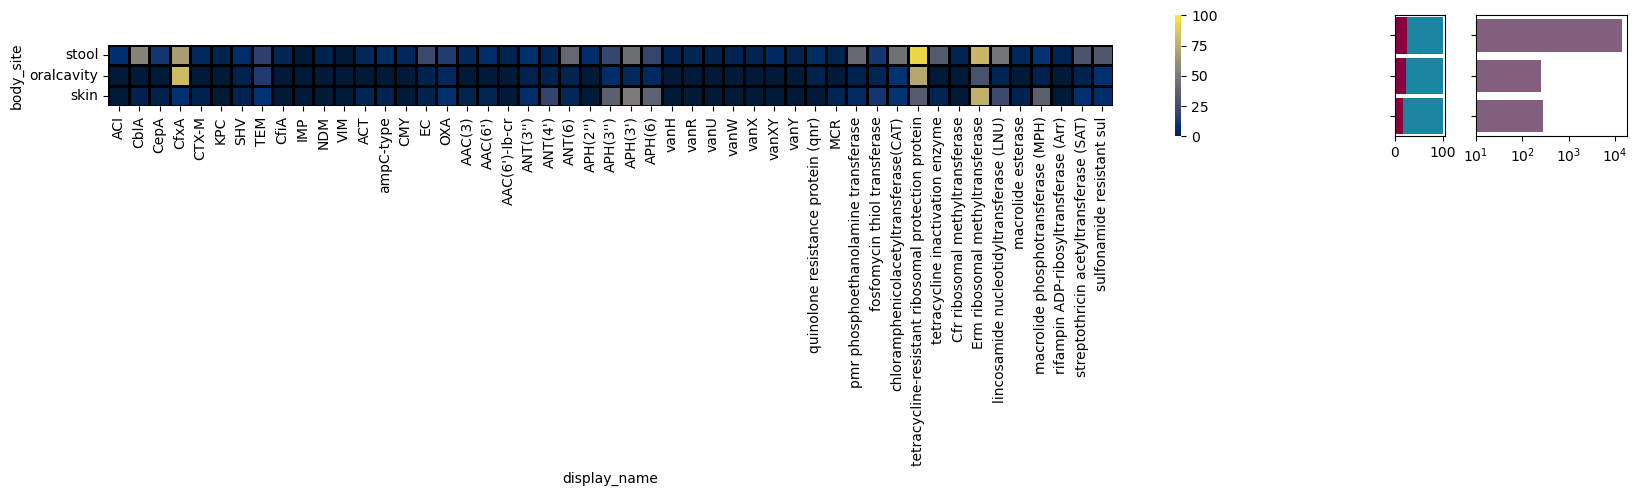

In [24]:
import matplotlib.colors
fig, ax = plt.subplots(1,3, figsize=(16,1.8), sharey='row', gridspec_kw={'width_ratios': [10,0.4,1.2]})
plt.rcParams['svg.fonttype'] = 'none'
plt.tight_layout()

# bars showing proportion pathogens
y_ticks = body_site_totals["body_site"]
y_tick_pos = [i + 0.5 for i in range(len(y_ticks))]
color=['#89023E','#1985A1']
#ax[1].barh(y_tick_pos, bar_data["hundo"], height=0.9, align='center', color=color[1])
ax[1].barh(y_tick_pos, 100, height=0.9, align='center', color=color[1])
ax[1].barh(y_tick_pos, body_site_totals["percent_unhealthy"], height=0.9, color=color[0])
ax[1].set_yticks(y_tick_pos)

# bars showing total isolates
c=['#988395','#82607D','#79B791','#C17767','#9A8C98']
ax[2].barh(y_tick_pos, body_site_totals["total_body_site"], align='center', color=c[1])
ax[2].set_yticks(y_tick_pos)
ax[2].set_xscale('log')   
ax[2].set_xticks([10,100,1000,10000])


cmap_colors=sns.color_palette("cividis", n_colors=10000)
cmap_colors=[[0,.1,.22]]+list(cmap_colors)
custom_map=matplotlib.colors.ListedColormap(cmap_colors, name='cividis_black')
#heatmap
sns.heatmap(body_map, cmap=custom_map, linewidth=1, linecolor='black', ax=ax[0], square=True, vmax=100)

#plt.savefig(OUT+"figures/heatmaps/body_select_gene_fams__plit_tetO_id90_cov80_p.0001.svg")
#plt.savefig(OUT+"figures/heatmaps/body_select_gene_fams_id90_cov80_p.0001.png")
#body_map.to_csv(OUT+"figures/heatmaps/body_select_gene_fams_id90_cov80_p.0001.txt",sep='\t')

<AxesSubplot:xlabel='display_name'>

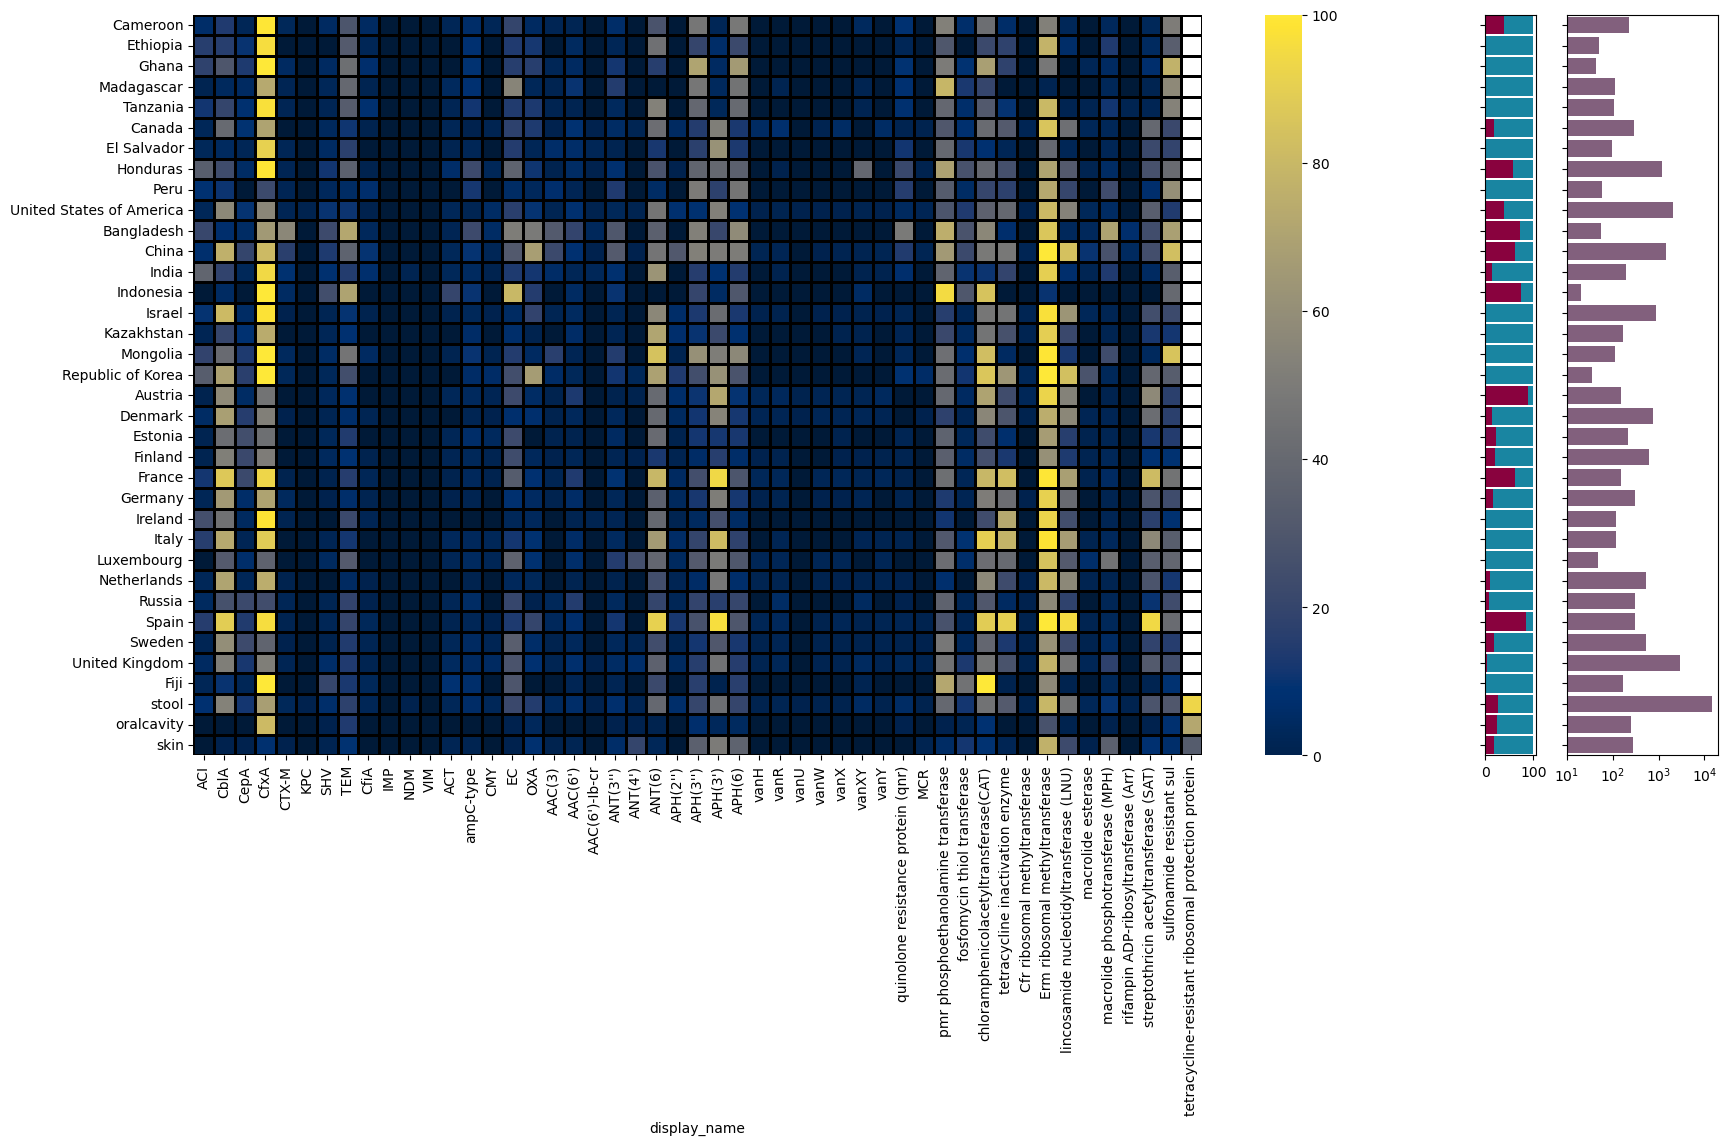

In [25]:
# plot country and body_site results in the same heatmap

totals_to_combo=body_site_totals.copy()
totals_to_combo.insert(0, "full_country", "body_site")
totals_to_combo=totals_to_combo.rename({"body_site":"continent", "total_body_site":"total_country"}, axis=1)

combo_map=pd.concat([country_map.droplevel(0),body_map])
combo_totals=pd.concat([country_totals,totals_to_combo])

fig, ax = plt.subplots(1,3, figsize=(16,8), sharey='row', gridspec_kw={'width_ratios': [10,0.4,1.2]})
plt.rcParams['svg.fonttype'] = 'none'
plt.tight_layout()

# bars showing proportion pathogens
y_ticks = combo_totals["full_country"]
y_tick_pos = [i + 0.5 for i in range(len(y_ticks))]
color=['#89023E','#1985A1']
#ax[1].barh(y_tick_pos, bar_data["hundo"], height=0.9, align='center', color=color[1])
ax[1].barh(y_tick_pos, 100, height=0.9, align='center', color=color[1])
ax[1].barh(y_tick_pos, combo_totals["percent_unhealthy"], height=0.9, color=color[0])
ax[1].set_yticks(y_tick_pos)

# bars showing total isolates
c=['#988395','#82607D','#79B791','#C17767','#9A8C98']
ax[2].barh(y_tick_pos, combo_totals["total_country"], align='center', color=c[1])
ax[2].set_yticks(y_tick_pos)
ax[2].set_xscale('log')   
ax[2].set_xticks([10,100,1000,10000])

cmap_colors=sns.color_palette("cividis", n_colors=10000)
cmap_colors=[[0,.1,.22]]+list(cmap_colors)
custom_map=matplotlib.colors.ListedColormap(cmap_colors, name='cividis_black')
#heatmap
sns.heatmap(combo_map, cmap=custom_map, linewidth=1, linecolor='black', ax=ax[0], square=True)

#plt.savefig(OUT+"figures/heatmaps/country_body_combo_id90_cov80_p.0001.svg")
#plt.savefig(OUT+"figures/heatmaps/country_body_combo_id90_cov80_p.0001.png")
#country_map.to_csv(OUT+"figures/heatmaps/body_select_gene_fams_id90_cov80_p.0001.txt",sep='\t')

# How many gene clusters make up each gene family?

In [26]:
RGI="/workdir/users/pd378/oil_international/args_prevelence/custom_card_search/"
rgi_detected_genes=pd.read_csv(RGI+"rgi_analysis/publication_tabs/rgi_detected_gene_culters.txt",sep='\t')
rgi_fam_counts=rgi_detected_genes.groupby("AMR Gene Family").size().reset_index(name="isolate_count")
rgi_fam_counts.head(2)

,AMR Gene Family,isolate_count
0,16S rRNA methyltransferase (A1408),1
1,16S rRNA methyltransferase (G1405),9


In [27]:
detected_genes_per_family=collapse_kma_data[["ARO Name","AMR Gene Family"]].drop_duplicates().groupby("AMR Gene Family").size().reset_index(name="metagenome_count")
total_card_clusters=card_reps[["ARO Name","AMR Gene Family"]].drop_duplicates().groupby("AMR Gene Family").size().reset_index(name="total_count")
detected_genes_per_family=pd.merge(left=detected_genes_per_family, right=total_card_clusters, on="AMR Gene Family", how='outer')
select_genes_per_family=pd.merge(left=selected_gene_fams, right=detected_genes_per_family, on="AMR Gene Family", how='left').fillna(0)
select_genes_per_family=select_genes_per_family.sort_values(["Grouping","grouped_family","display_name"], key=lambda col: col.str.lower())
drop_fams=["APH(2''); AAC(6')","EC beta-lactamase","AAC(6')-Ib-cr"]
select_genes_per_family=select_genes_per_family[~select_genes_per_family["AMR Gene Family"].isin(drop_fams)]
select_genes_per_family=pd.merge(left=select_genes_per_family, right=rgi_fam_counts, on=["AMR Gene Family"], how='left')
select_genes_per_family.head(2)

,AMR Gene Family,display_name,Resistance Mechanism,grouped_family,Antibioitic Types,Grouping,mechansim_and_beta_lactams,scatter_groups,metagenome_count,total_count,isolate_count
0,ACI beta-lactamase,ACI,antibiotic inactivation,Class A beta-lactamase,beta-lactams,A,beta-lactams,Class A beta-lactamase,1.0,1.0,1
1,CblA beta-lactamase,CblA,antibiotic inactivation,Class A beta-lactamase,beta-lactams,A,beta-lactams,Class A beta-lactamase,1.0,1.0,1


In [28]:
select_genes_per_family['total_count'].max()

330.0

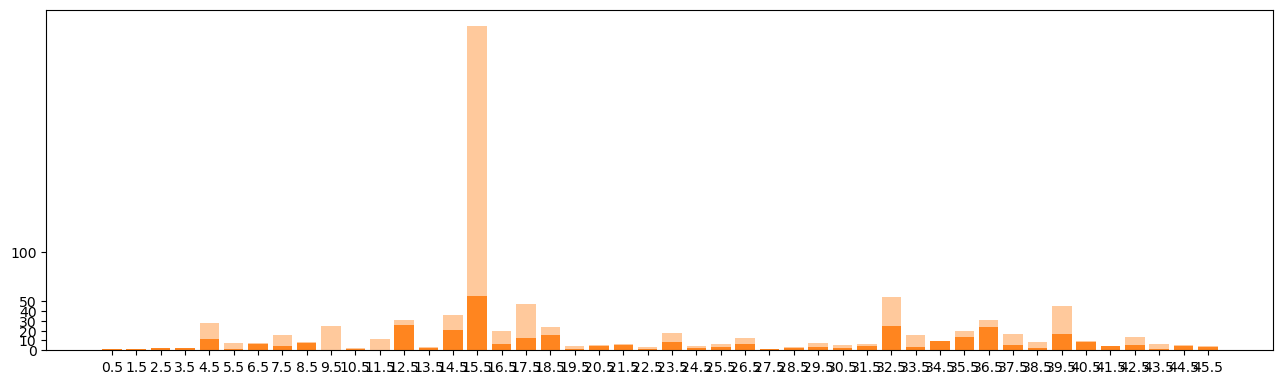

In [29]:
fig, ax = plt.subplots(figsize=(13,4))
plt.rcParams['svg.fonttype'] = 'none'
plt.tight_layout()

y_ticks = select_genes_per_family["AMR Gene Family"]
y_tick_pos = [i + 0.5 for i in range(len(y_ticks))]
color=['#FFC99C','#FF851F']
ax.bar(y_tick_pos, select_genes_per_family["total_count"], align='center', color=color[0])
#ax.bar(y_tick_pos, select_genes_per_family["isolate_count"], align='center', color=c[1], width=0.6)
ax.bar(y_tick_pos, select_genes_per_family["metagenome_count"], align='center', color=color[1])
ax.set_xticks(y_tick_pos)
ax.set_yticks([0,10,20,30,40,50,100])

#plt.savefig(OUT+"figures/heatmaps/arg_99_clusters_per_family_bars.svg")
#plt.savefig(OUT+"figures/heatmaps/arg_99_clusters_per_family_bars.png")#

### make coundt bars for the supplimental figure

In [30]:
order_map=meta_profiles.pivot_table(index=["continent","full_country"], columns=["Grouping","display_name"], values="percent_country").fillna(0)
order_map=order_map.T.sort_index(axis=1, key=lambda col: col.str.lower())
order_map=order_map.T.sort_index(axis=1, key=lambda col: col.str.lower())
order_map=order_map.T.droplevel(0)
order_map=order_map.T.droplevel(0)
order_df=pd.DataFrame(order_map.columns.to_list(), columns=['display_name'])
order_df.head(2)

,display_name
0,ACC
1,ACI


In [38]:
detected_genes_per_family=collapse_kma_data[["ARO Name","AMR Gene Family"]].drop_duplicates().groupby("AMR Gene Family").size().reset_index(name="metagenome_count")
total_card_clusters=card_reps[["ARO Name","AMR Gene Family"]].drop_duplicates().groupby("AMR Gene Family").size().reset_index(name="total_count")
detected_genes_per_family=pd.merge(left=detected_genes_per_family, right=total_card_clusters, on="AMR Gene Family", how='outer')
all_genes_per_family=pd.merge(left=all_gene_fams, right=detected_genes_per_family, on="AMR Gene Family", how='left').fillna(0)
all_genes_per_family=all_genes_per_family.sort_values(["Grouping","grouped_family","display_name"], key=lambda col: col.str.lower())
drop_fams=["APH(2''); AAC(6')","EC beta-lactamase","AAC(6')-Ib-cr"]
all_genes_per_family=all_genes_per_family[~all_genes_per_family["AMR Gene Family"].isin(drop_fams)]
all_genes_per_family=pd.merge(left=all_genes_per_family, right=rgi_fam_counts, on=["AMR Gene Family"], how='left')
all_genes_per_family.head(2)

,AMR Gene Family,display_name,Resistance Mechanism,antibioitc_classes,grouped_family,Antibioitic Types,Grouping,mechansim_and_beta_lactams,scatter_groups,metagenome_count,total_count,isolate_count
0,ACI beta-lactamase,ACI,antibiotic inactivation,"cephalosporin,penam",Class A beta-lactamase,beta-lactams,A,beta-lactams,Class A beta-lactamase,1.0,1.0,1.0
1,AXC beta-lactamase,AXC,antibiotic inactivation,carbapenem,Class A beta-lactamase,beta-lactams,A,beta-lactams,Class A beta-lactamase,1.0,3.0,2.0


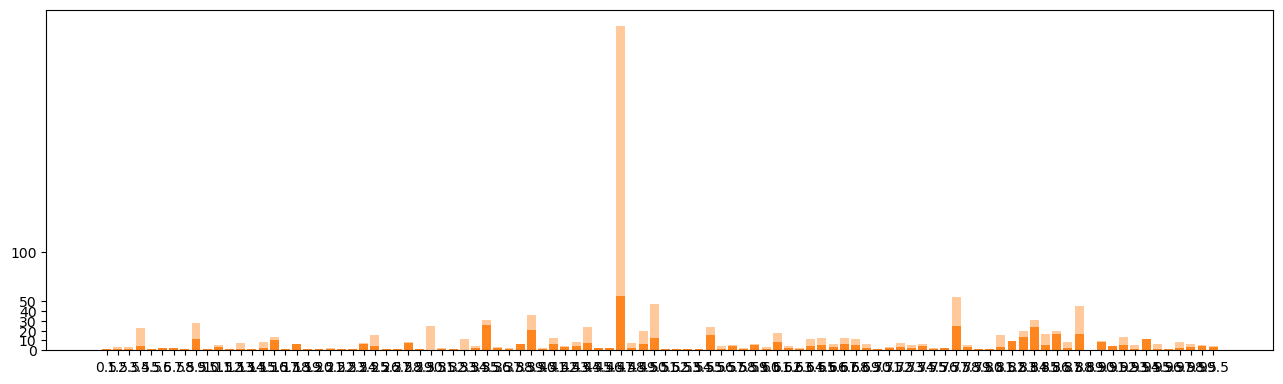

In [35]:
fig, ax = plt.subplots(figsize=(13,4))
plt.rcParams['svg.fonttype'] = 'none'
plt.tight_layout()

y_ticks = all_genes_per_family["AMR Gene Family"]
y_tick_pos = [i + 0.5 for i in range(len(y_ticks))]
color=['#89023E','#1985A1']
ax.bar(y_tick_pos, all_genes_per_family["total_count"], align='center', color='#FFC99C')
#ax.bar(y_tick_pos, all_genes_per_family["isolate_count"], align='center', color=c[1], width=0.6)
ax.bar(y_tick_pos, all_genes_per_family["metagenome_count"], align='center', color='#FF851F')
ax.set_xticks(y_tick_pos)
ax.set_yticks([0,10,20,30,40,50,100])

#plt.savefig(OUT+"figures/heatmaps/all_arg_c99_lusters_per_family_bars.svg")
#plt.savefig(OUT+"figures/heatmaps/all_arg_99_clusters_per_family_bars.png")
all_genes_per_family.to_csv(OUT+"figures/heatmaps/all_arg_99_clusters_per_family_bars_axis_labels.txt", sep='\t')

### Calculate the global prevelence for each gene for comparison with phylogenic diversity

In [39]:
clust_id="99"
collapse_kma_data=pd.read_csv(OUT+"kma_results/clustered_"+clust_id+"_kma.res", sep='\t', index_col=0)
global_prev=sample_family_profiles=pd.merge(collapse_kma_data[["study_name","sample_id","ARO Accession","ARO Name","AMR Gene Family"]], sample_data, on=["study_name","sample_id"], how='inner')
global_prev=global_prev[global_prev["body_site"]=="stool"]

global_prev=group_and_count(global_prev, ["ARO Name","AMR Gene Family"], "gene_count")
global_prev["percent_prevelence"]=100*global_prev["gene_count"]/body_site_totals.iloc[0]["total_body_site"]
global_prev=pd.merge(left=selected_gene_fams, right=global_prev, on="AMR Gene Family", how='outer')
#global_prev.to_csv(OUT+"arg_profiles/global_prevelence_gene_"+clust_id+".txt",sep='\t')
global_prev.head(2)

,AMR Gene Family,display_name,Resistance Mechanism,grouped_family,Antibioitic Types,Grouping,mechansim_and_beta_lactams,scatter_groups,ARO Name,gene_count,percent_prevelence
0,AAC(3),AAC(3),antibiotic inactivation,aminoglycoside acetyltransferase,aminoglycosides,B,antibiotic inactivation,aminoglycosides,AAC(3)-IId,386.0,2.665930
1,AAC(3),AAC(3),antibiotic inactivation,aminoglycoside acetyltransferase,aminoglycosides,B,antibiotic inactivation,aminoglycosides,AAC(3)-IIe,132.0,0.911665


In [40]:
def group_and_count(df, groupings, name):
    return df.groupby(groupings).size().reset_index(name=name)

In [41]:
body_site_totals#.iloc[2]["total_body_site"]

,body_site,total_body_site,total_healthy,percent_healthy,percent_unhealthy
2,stool,14479,10756,74.286898,25.713102
0,oralcavity,256,195,76.171875,23.828125
1,skin,278,230,82.733813,17.266187


### NDM only found in two ppl in GuptaA_2019, India
* both have CRC and similar age

### KPC in multiple samples from one premature infant in USA

In [62]:
gene_family_profile[gene_family_profile["AMR Gene Family"].isin(["NDM beta-lactamase","KPC beta-lactamase"])].tail(3)


,study_name,sample_id,AMR Gene Family,subject_id,body_site,antibiotics_current_use,disease,age,age_category,gender,country,non_westernized,study_condition,condition,healthy_test,full_country,continent,sub_region,sub_sub_region
25817,BrooksB_2017,N2_035_010G1,KPC beta-lactamase,N2_035,stool,NaN,premature_born,0.0,newborn,male,USA,no,NaN,not_healthy,0,United States of America,Americas,North America,Northern America
177507,GuptaA_2019,GupDM_A1,NDM beta-lactamase,GupDM_A1,stool,no,CRC,62.0,adult,male,IND,no,NaN,not_healthy,0,India,Asia,South-eastern Asia,NaN
179358,GuptaA_2019,GupDM_A10,NDM beta-lactamase,GupDM_A10,stool,no,CRC,65.0,adult,female,IND,no,NaN,not_healthy,0,India,Asia,South-eastern Asia,NaN


## A quick PCoA on the country AB profiles to see if countries group in any way

/home/pd378/miniconda3/envs/jupyter2/lib/python3.7/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:152: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.037870365064365565 and the largest is 0.9762984533529473.
  RuntimeWarning


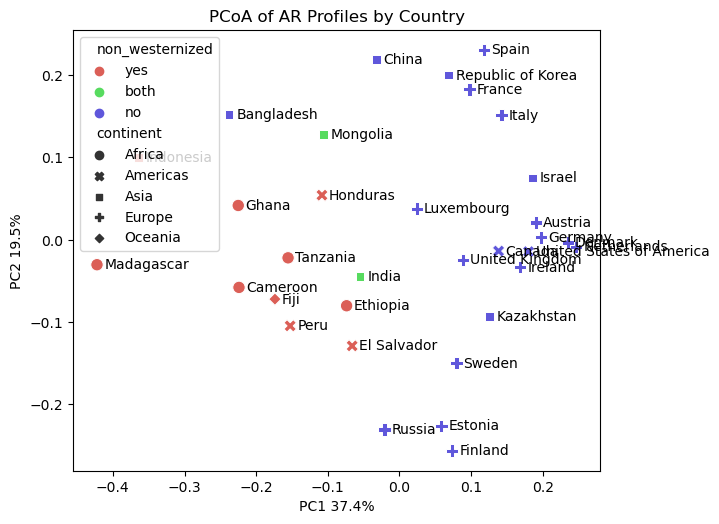

In [42]:
import scipy.spatial.distance
import skbio.stats.ordination

vectors=country_map.droplevel(0)
distances=scipy.spatial.distance.pdist(vectors, metric="braycurtis")
distances=scipy.spatial.distance.squareform(distances)
ordinate=skbio.stats.ordination.pcoa(distances)

plot_data=ordinate.samples
plot_data["full_country"]=country_totals["full_country"].to_list()
plot_data["continent"]=country_totals["continent"].to_list()

counry_codes2=pd.read_csv(OUT+"metadata/country_code_definitions.txt", sep='\t')
plot_data=pd.merge(left=plot_data, right=counry_codes2[["full_country","non_westernized"]], on="full_country")

pc1= "PC1 "+str(np.around(100*ordinate.proportion_explained[0], 1))+"%"
pc2= "PC2 "+str(np.around(100*ordinate.proportion_explained[1], 1))+"%"

#fig, ax = plt.subplots(1,2, figsize=(10,5), sharey=True)
fig, ax = plt.subplots(figsize=(6,5))
plt.rcParams['svg.fonttype'] = 'none'
plt.tight_layout()

g=sns.scatterplot(data=plot_data, x="PC1", y="PC2", hue="non_westernized", style="continent", s=80, palette='hls', hue_order=['yes','both','no'])
g.set_xlabel(pc1)
g.set_ylabel(pc2)
g.set_title("PCoA of AR Profiles by Country")

for i, country in enumerate(plot_data["full_country"]):
    g.annotate(country, (plot_data["PC1"][i]+0.01, plot_data["PC2"][i]-0.005) )

#plt.savefig(OUT+"figures/pcoa/pcoa_gnene_profiles_annot.png")
#plt.savefig(OUT+"figures/pcoa/pcoa_gnene_profiles_annot.svg")

## Collect some info about how many genes and gene families are present per sample

In [44]:
### count the number of gene per sample for making a histogram
### first curate the data
kma_all_gene_fams=collapse_kma_data[collapse_kma_data["AMR Gene Family"].isin(all_gene_fams["AMR Gene Family"])]
kma_all_gene_fams=pd.merge(kma_all_gene_fams, sample_data, on=["study_name","sample_id"], how='inner')
kma_select_gene_fams=kma_all_gene_fams[kma_all_gene_fams["AMR Gene Family"].isin(selected_gene_fams["AMR Gene Family"])]

### now group and count for individual genes
all_fam_gene_count=group_and_count(kma_all_gene_fams, ["sample_id",'body_site','non_westernized','condition'], "all_gene_count")
select_fam_gene_count=group_and_count(kma_select_gene_fams, ["sample_id",'body_site','non_westernized','condition'], "select_gene_count")
counting_df=pd.merge(all_fam_gene_count,select_fam_gene_count, on=["sample_id",'body_site','non_westernized','condition'])

### repeat for counting gene families (as opposed to individual genes)
all_fams_per_sample=group_and_count(kma_all_gene_fams.drop_duplicates(['sample_id','AMR Gene Family']), ["sample_id",'body_site','non_westernized','condition'], "all_family_count")
select_fams_per_sample=group_and_count(kma_select_gene_fams.drop_duplicates(['sample_id','AMR Gene Family']), ["sample_id",'body_site','non_westernized','condition'], "select_family_count")
counting_df=pd.merge(counting_df,all_fams_per_sample, on=["sample_id",'body_site','non_westernized','condition'])
counting_df=pd.merge(counting_df,select_fams_per_sample, on=["sample_id",'body_site','non_westernized','condition'])

### add in the samples which have no detections
non_detections=screened_sample_data[~screened_sample_data["sample_id"].isin(kma_all_gene_fams["sample_id"].drop_duplicates())]
non_detections=non_detections[["sample_id",'body_site','non_westernized','condition']]
### add the non-detections to the rest of the data
counting_df=pd.concat([counting_df,non_detections]).fillna(0)

melt_count=pd.melt(counting_df, id_vars=["sample_id",'body_site','non_westernized','condition'], 
                  value_vars=['all_gene_count','select_gene_count','all_family_count','select_family_count'],
                  var_name='count_type', value_name='count')
stool_count=melt_count[melt_count['body_site']=='stool']
melt_count.head(2)

,sample_id,body_site,non_westernized,condition,count_type,count
0,A01_02_1FE,stool,yes,healthy,all_gene_count,17.0
1,A02_01_1FE,stool,yes,healthy,all_gene_count,11.0


Text(0.5, 1.0, 'gene families per sample')

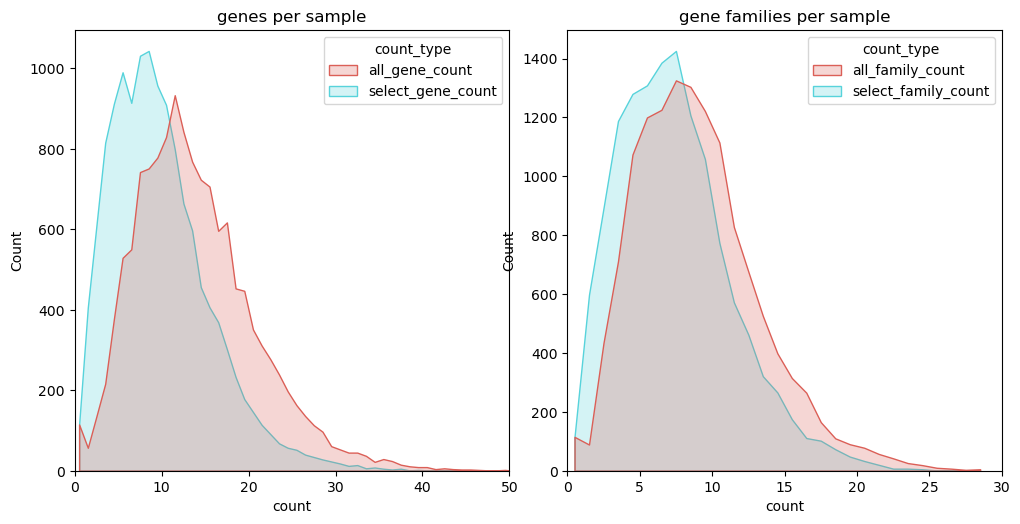

In [45]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
plt.rcParams['svg.fonttype'] = 'none'
plt.tight_layout()
read_meta=pd.merge(left=sample_data, right=meta[["sample_id","number_reads",'number_bases','median_read_length']], on="sample_id", how='inner')
gene_hist=stool_count[stool_count["count_type"].isin(['all_gene_count','select_gene_count'])]
family_hist=stool_count[stool_count["count_type"].isin(['all_family_count','select_family_count'])]
gene_hist=pd.merge(left=gene_hist, right=read_meta[["sample_id",'country',"number_reads",'number_bases','median_read_length']], on="sample_id", how='inner')
family_hist=pd.merge(left=family_hist, right=read_meta[["sample_id",'country',"number_reads",'number_bases','median_read_length']], on="sample_id", how='inner')

sns.histplot(gene_hist, x="count", binwidth=1, hue='count_type', element="poly", ax=ax[0], palette='hls').set_xlim(0,50)
sns.histplot(family_hist, x="count", binwidth=1, hue='count_type', element="poly", ax=ax[1], palette='hls').set_xlim(0,30)
ax[0].set_title("genes per sample")
ax[1].set_title("gene families per sample")

#plt.savefig(OUT+"figures/sample_summary_figs/histogram_genes_and_fams_per_sample.svg")
#plt.savefig(OUT+"figures/sample_summary_figs/histogram_genes_and_fams_per_sample.png")

### How does depper sequencing aeffect gene detection?

NameError: name 'ydata' is not defined

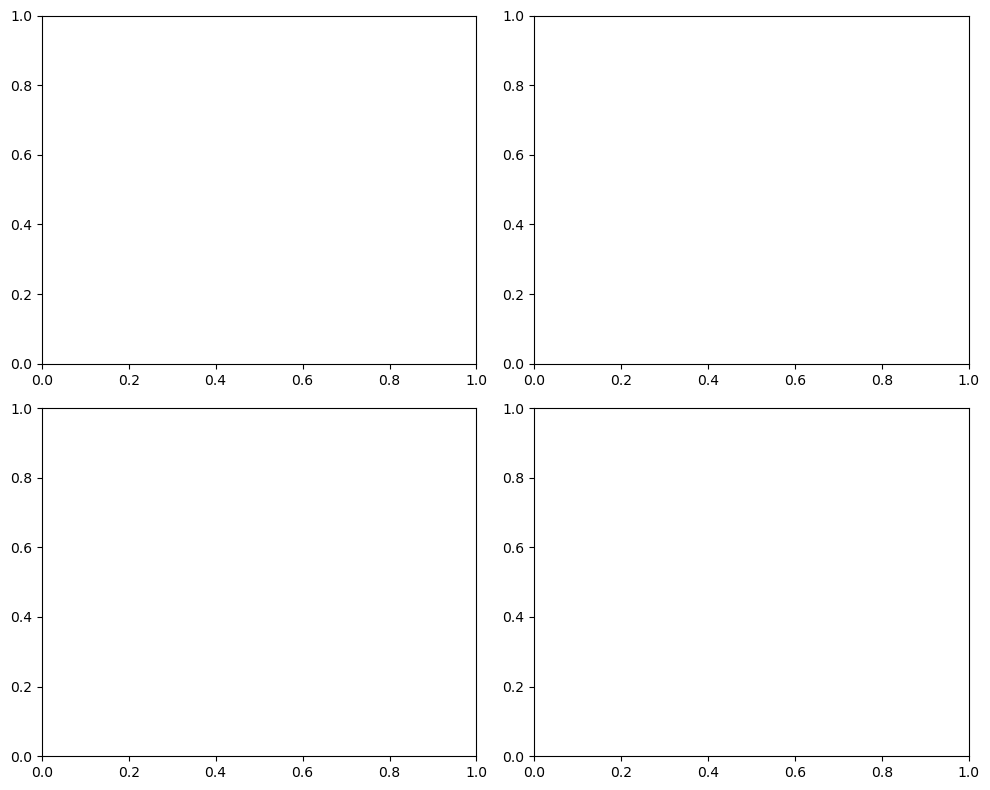

In [47]:
from scipy.optimize import curve_fit
def power_law(x, a, b):
    return a*np.power(x, b)

fig, ax = plt.subplots(2,2, figsize=(10,8))
plt.rcParams['svg.fonttype'] = 'none'
plt.tight_layout()

def get_data(data, analysis_type):
    xdata=counting_reads_df[counting_reads_df['count_type']==analysis_type]["number_bases"]
    ydata=counting_reads_df[counting_reads_df['count_type']==analysis_type]["count"]
    return [xdata,ydata]
def fit_power(x_y_data):  
    # Fit the power-law data
    pars, cov = curve_fit(f=power_law, xdata=x_y_data[0], ydata=x_y_data[1], p0=[0, 0], bounds=(-np.inf, np.inf))
    # Get the standard deviations of the parameters (square roots of the # diagonal of the covariance)
    stdevs = np.sqrt(np.diag(cov))
    # Calculate the residuals
    res = ydata - power_law(xdata, *pars)
    return [pars, cov, stdevs, res]
 
colors=["#cb6d67","#67c5cb"]
counting_reads_df=gene_hist[gene_hist['number_reads']<=400000000]
counting_reads_df=counting_reads_df[counting_reads_df['body_site']=='stool']

x_y_data=get_data(counting_reads_df, 'all_gene_count')
fits=fit_power(x_y_data)
sns.lineplot(x_y_data[0], power_law(x_y_data[0], *fits[0]), ax=ax[0][0])
sns.scatterplot(x_y_data[0], x_y_data[1], ax=ax[0][0], alpha=0.1, color=colors[0])
ax[0][0].set_title("all genes")
ax[0][0].set_ylabel("detections per sample")
ax[0][0].set_ylim(50*-0.03,50)
ax[0,0].text(15000000000,45, "a =  "+str(round(fits[0][0], 4))+"±"+str(round(fits[2][0], 5)), horizontalalignment='left')
ax[0,0].text(15000000000,40, "b =  "+str(round(fits[0][1], 4))+"±"+str(round(fits[2][1], 5)), horizontalalignment='left')

x_y_data=get_data(counting_reads_df, 'select_gene_count')
fits=fit_power(x_y_data)
sns.lineplot(x_y_data[0], power_law(x_y_data[0], *fits[0]), ax=ax[0][1])
sns.scatterplot(x_y_data[0], x_y_data[1], ax=ax[0][1], alpha=0.1, color=colors[1])
ax[0][1].set_title("clinical genes")
ax[0][1].set_ylabel("detections per sample")
ax[0][1].set_ylim(50*-0.03,50)
ax[0,1].text(15000000000,45, "a =  "+str(round(fits[0][0], 4))+"±"+str(round(fits[2][0], 5)), horizontalalignment='left')
ax[0,1].text(15000000000,40, "b =  "+str(round(fits[0][1], 4))+"±"+str(round(fits[2][1], 5)), horizontalalignment='left')

counting_reads_df=family_hist[family_hist['number_reads']<=400000000]
counting_reads_df=counting_reads_df[counting_reads_df['body_site']=='stool']

x_y_data=get_data(counting_reads_df, 'all_family_count')
fits=fit_power(x_y_data)
sns.lineplot(x_y_data[0], power_law(x_y_data[0], *fits[0]), ax=ax[1][0])
sns.scatterplot(x_y_data[0], x_y_data[1], ax=ax[1][0], alpha=0.1, color=colors[0])
ax[1][0].set_title("all families")
ax[1][0].set_ylabel("detections per sample")
ax[1][0].set_ylim(30*-0.03,30)
ax[1,0].text(15000000000,27, "a =  "+str(round(fits[0][0], 4))+"±"+str(round(fits[2][0], 5)), horizontalalignment='left')
ax[1,0].text(15000000000,25, "b =  "+str(round(fits[0][1], 4))+"±"+str(round(fits[2][1], 5)), horizontalalignment='left')

x_y_data=get_data(counting_reads_df, 'select_family_count')
fits=fit_power(x_y_data)
sns.lineplot(x_y_data[0], power_law(x_y_data[0], *fits[0]), ax=ax[1][1])
sns.scatterplot(x_y_data[0], x_y_data[1], ax=ax[1][1], alpha=0.1, color=colors[1])
ax[1][1].set_title("clinical families")
ax[1][1].set_ylabel("detections per sample")
ax[1][1].set_ylim(30*-0.03,30)
ax[1,1].text(15000000000,27, "a =  "+str(round(fits[0][0], 4))+"±"+str(round(fits[2][0], 5)), horizontalalignment='left')
ax[1,1].text(15000000000,25, "b =  "+str(round(fits[0][1], 4))+"±"+str(round(fits[2][1], 5)), horizontalalignment='left')

#plt.savefig(OUT+"figures/sample_summary_figs/sequencing_vs_detections_powerlaw_fit.svg")
#plt.savefig(OUT+"figures/sample_summary_figs/sequencing_vs_detections_powerlaw_fit.png")

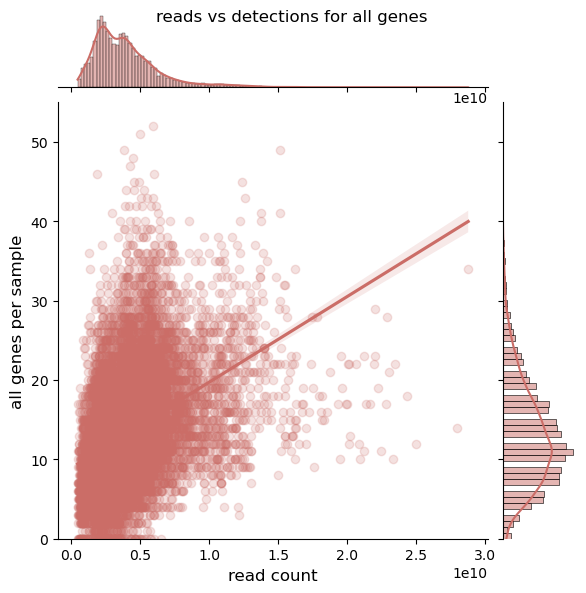

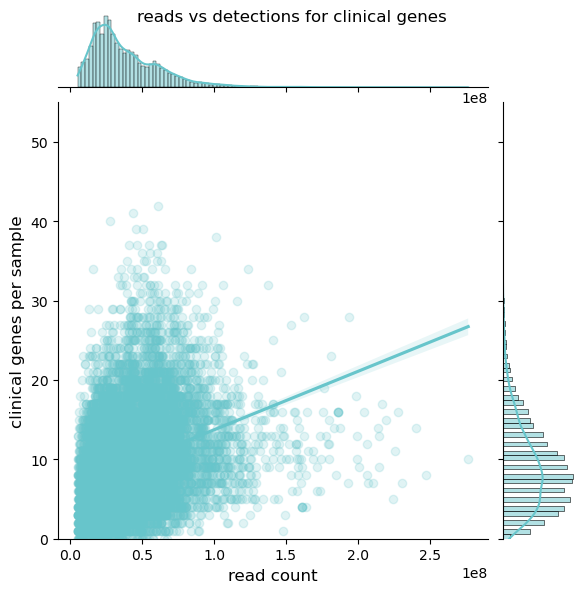

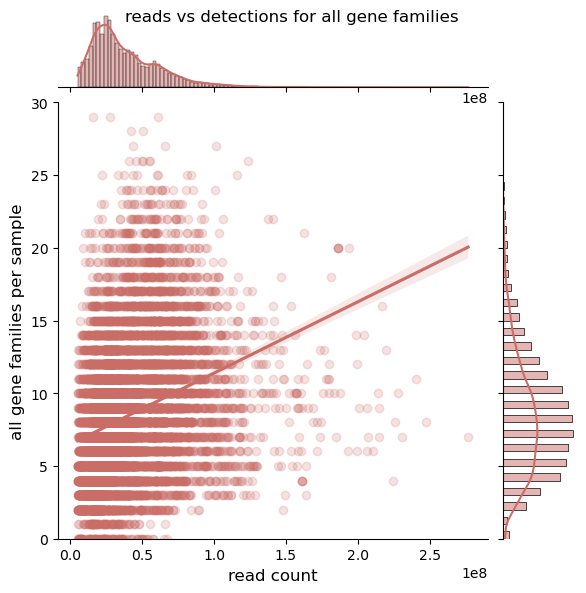

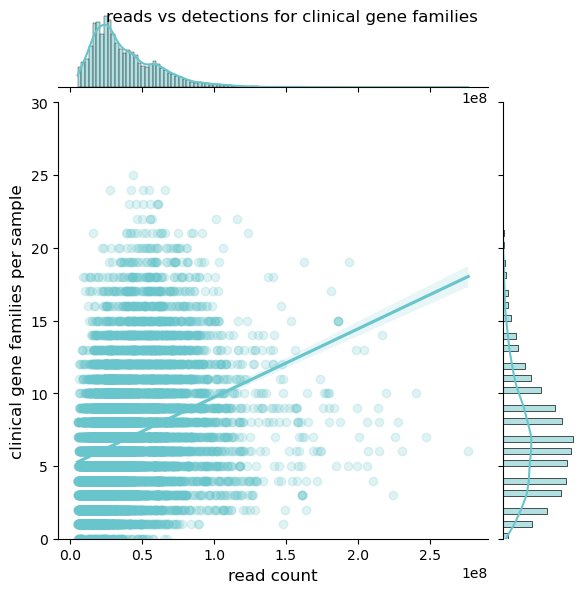

In [48]:
counting_reads_df=gene_hist[gene_hist['number_reads']<=400000000]
counting_reads_df=counting_reads_df[counting_reads_df['body_site']=='stool']
colors=["#cb6d67","#67c5cb"]
g1=sns.jointplot(data=counting_reads_df[counting_reads_df['count_type']=='all_gene_count'], x="number_bases", y="count", kind="reg", 
                joint_kws ={'scatter_kws':dict(alpha=0.2)}, color=colors[0])
g1.fig.suptitle("reads vs detections for all genes")
g1.ax_marg_y.set_ylim(0, 55)
g1.set_axis_labels('read count', 'all genes per sample', fontsize=12)

g2=sns.jointplot(data=counting_reads_df[counting_reads_df['count_type']=='select_gene_count'], x="number_reads", y="count", kind="reg", 
                joint_kws ={'scatter_kws':dict(alpha=0.2)}, color=colors[1])
g2.fig.suptitle("reads vs detections for clinical genes")
g2.ax_marg_y.set_ylim(0, 55)
g2.set_axis_labels('read count', 'clinical genes per sample', fontsize=12)

counting_reads_df=family_hist[family_hist['number_reads']<=400000000]
counting_reads_df=counting_reads_df[counting_reads_df['body_site']=='stool']
g3=sns.jointplot(data=counting_reads_df[counting_reads_df['count_type']=='all_family_count'], x="number_reads", y="count", kind="reg", 
                joint_kws ={'scatter_kws':dict(alpha=0.2)}, color=colors[0])
g3.fig.suptitle("reads vs detections for all gene families")
g3.ax_marg_y.set_ylim(0, 30)
g3.set_axis_labels('read count', 'all gene families per sample', fontsize=12)

g4=sns.jointplot(data=counting_reads_df[counting_reads_df['count_type']=='select_family_count'], x="number_reads", y="count", kind="reg", 
                joint_kws ={'scatter_kws':dict(alpha=0.2)}, color=colors[1])
g4.fig.suptitle("reads vs detections for clinical gene families")
g4.ax_marg_y.set_ylim(0, 30)
g4.set_axis_labels('read count', 'clinical gene families per sample', fontsize=12)

#g1.savefig(OUT+"figures/sample_summary_figs/regression_plots_for_reads/all_genes_v_reads.svg")
#g1.savefig(OUT+"figures/sample_summary_figs/regression_plots_for_reads/all_genes_v_reads.png")
#g2.savefig(OUT+"figures/sample_summary_figs/regression_plots_for_reads/clinical_genes_v_reads.svg")
#g2.savefig(OUT+"figures/sample_summary_figs/regression_plots_for_reads/clinical_genes_v_reads.png")
#g3.savefig(OUT+"figures/sample_summary_figs/regression_plots_for_reads/all_families_v_reads.svg")
#g3.savefig(OUT+"figures/sample_summary_figs/regression_plots_for_reads/all_families_v_reads.png")
#g4.savefig(OUT+"figures/sample_summary_figs/regression_plots_for_reads/clinical_families_v_reads.svg")
#g4.savefig(OUT+"figures/sample_summary_figs/regression_plots_for_reads/clinical_families_v_reads.png")


### calculate correlations 
from scipy.stats.stats import pearsonr
p_stats=[]
pearson=pearsonr(gene_hist[gene_hist['count_type']=='all_gene_count']["number_reads"], gene_hist[gene_hist['count_type']=='all_gene_count']["count"])
p_stats.append(['all_genes']+list(pearson))
pearson=pearsonr(gene_hist[gene_hist['count_type']=='select_gene_count']["number_reads"], gene_hist[gene_hist['count_type']=='select_gene_count']["count"])
p_stats.append(['clinical_genes']+list(pearson))
pearson=pearsonr(family_hist[family_hist['count_type']=='all_family_count']["number_reads"], family_hist[family_hist['count_type']=='all_family_count']["count"])
p_stats.append(['all_families']+list(pearson))
pearson=pearsonr(family_hist[family_hist['count_type']=='select_family_count']["number_reads"], family_hist[family_hist['count_type']=='select_family_count']["count"])
p_stats.append(['clinical_families']+list(pearson))
p_stats=pd.DataFrame(p_stats, columns=['data','r','p-val'])
p_stats.to_csv(OUT+"figures/sample_summary_figs/regression_plots_for_reads/pearson_stats.txt",sep='\t')

In [59]:
read_meta.groupby('non_westernized'  ).mean()#.to_csv(OUT+'metadata/western_non-west_mean.txt', sep='\t')
#read_meta.groupby('non_westernized').median()#.to_csv(OUT+'metadata/western_non-west_median.txt', sep='\t')

,age,study_condition,healthy_test,number_reads,number_bases,median_read_length
non_westernized,,,,,,
no,34.007621,NaN,0.696781,3.685364e+07,3.801145e+09,109.684965
yes,34.539276,NaN,0.913944,4.438704e+07,4.753090e+09,115.883665


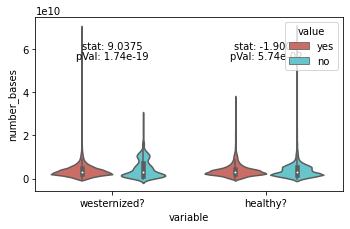

In [845]:
.meanfig, ax = plt.subplots(figsize=(5,3))
plt.rcParams['svg.fonttype'] = 'none'
plt.tight_layout()

fuck_me=read_meta.melt(id_vars=['sample_id','number_bases'],value_vars=['non_westernized','condition'])
fuck_me["value"]=fuck_me['value'].map({'not_healthy':'no','healthy':'yes', 'yes':'no','no':'yes'})
fuck_me["variable"]=fuck_me['variable'].map({'non_westernized':'westernized?','condition':'healthy?'})
fuck_me
g=sns.violinplot(data=fuck_me, x='variable', y='number_bases', palette='hls', hue='value')

t_test=stats.ttest_ind(read_meta[read_meta["non_westernized"]=="yes"]["number_reads"],
                       read_meta[read_meta["non_westernized"]=="no"]["number_reads"])
g.text(0.0,60000000000, "stat: "+str(round(t_test[0], 4)), horizontalalignment='center')
g.text(0.0,55000000000, "pVal: "+str('{:0.2e}'.format(t_test[1], 4)), horizontalalignment='center')

t_test=stats.ttest_ind(read_meta[read_meta["condition"]=="not_healthy"]["number_reads"],
                       read_meta[read_meta["condition"]=="healthy"]["number_reads"])
g.text(1,60000000000, "stat: "+str(round(t_test[0], 4)), horizontalalignment='center')
g.text(1,55000000000, "pVal: "+str('{:0.2e}'.format(t_test[1], 4)), horizontalalignment='center')


plt.savefig(OUT+"figures/sample_summary_figs/sequencing_by_condition_and_westernized.svg")
plt.savefig(OUT+"figures/sample_summary_figs/sequencing_by_condition_and_westernized.png")


### When I split the samples by conditions, is there a statistical difference in the number of gene families?
* short answer is yes no matter how I split (western, health condition, body site)
* could be a product of all these variable interplaying with eachother... how do I control for this???

In [240]:
renamed_counting_df=counting_df.copy()
rename_dict={'no':'western n=11,963', 'yes':'non_western n=985', 'healthy':'healthy n=9,934', 'not_healthy':'not_healthy n=3,014'}
renamed_counting_df['non_westernized']=renamed_counting_df['non_westernized'].map(rename_dict)
renamed_counting_df['condition']=renamed_counting_df['condition'].map(rename_dict)
renamed_counting_df.head(2)

,sample_id,non_westernized,condition,all_gene_count,select_gene_count,all_family_count,select_family_count
0,A01_02_1FE,non_western n=985,"healthy n=9,934",17.0,12.0,11.0,9.0
1,A02_01_1FE,non_western n=985,"healthy n=9,934",11.0,8.0,7.0,6.0


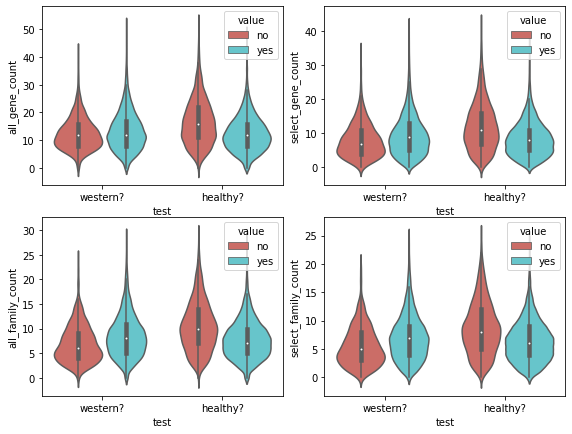

In [879]:
map_df1=renamed_counting_df.copy()
map_df1['mapping_condition']=map_df1['non_westernized']
map_df2=renamed_counting_df.copy()
map_df2['mapping_condition']=map_df2['condition']
grapher_df=pd.concat([map_df1,map_df2],axis=0)
grpah_map={"non_western n=985":'no','western n=11,963':'yes','healthy n=9,934':'yes','not_healthy n=3,014':'no'}
grapher_df['value']=grapher_df['mapping_condition'].map(grpah_map)
grpah_map={"non_western n=985":'western?','western n=11,963':'western?','healthy n=9,934':'healthy?','not_healthy n=3,014':'healthy?'}
grapher_df['test']=grapher_df['mapping_condition'].map(grpah_map)

fig, ax = plt.subplots(2,2, figsize=(8,6))
plt.rcParams['svg.fonttype'] = 'none'
plt.tight_layout()

sns.violinplot(data=grapher_df, x='test', y='all_gene_count', hue='value', palette='hls', ax=ax[0,0])
sns.violinplot(data=grapher_df, x='test', y='select_gene_count', hue='value', palette='hls', ax=ax[0,1])
sns.violinplot(data=grapher_df, x='test', y='all_family_count', hue='value', palette='hls', ax=ax[1,0])
sns.violinplot(data=grapher_df, x='test', y='select_family_count', hue='value', palette='hls', ax=ax[1,1])

plt.savefig(OUT+"figures/sample_summary_figs/violin_gene_family_count_conditions.svg")
plt.savefig(OUT+"figures/sample_summary_figs/violin_gene_family_count_conditions.png")

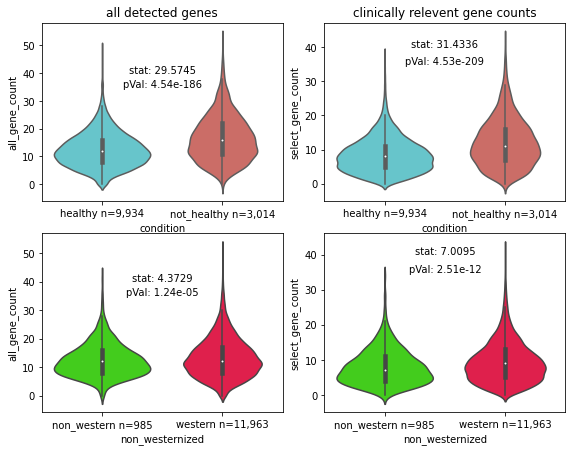

In [410]:
from scipy import stats

fig, ax = plt.subplots(2,2, figsize=(8,6))
plt.rcParams['svg.fonttype'] = 'none'
plt.tight_layout()

peeep=[sns.color_palette('hls',2)[1],sns.color_palette('hls',2)[0]]

t_test=stats.ttest_ind(renamed_counting_df[renamed_counting_df["condition"]=="not_healthy n=3,014"]["all_gene_count"],
                       renamed_counting_df[renamed_counting_df["condition"]=="healthy n=9,934"]["all_gene_count"]) 
sns.violinplot(data=renamed_counting_df, x="condition", y="all_gene_count", ax=ax[0,0], palette=peeep)#, order=['not_healthy','healthy'])
ax[0,0].text(0.5,40, "stat: "+str(round(t_test[0], 4)), horizontalalignment='center')
ax[0,0].text(0.5,35, "pVal: "+str('{:0.2e}'.format(t_test[1])), horizontalalignment='center')
ax[0,0].set_title("all detected genes")

t_test=stats.ttest_ind(renamed_counting_df[renamed_counting_df["non_westernized"]=="western n=11,963"]["all_gene_count"],
                       renamed_counting_df[renamed_counting_df["non_westernized"]=="non_western n=985"]["all_gene_count"])
sns.violinplot(data=renamed_counting_df, x="non_westernized", y="all_gene_count", ax=ax[1,0], palette='prism')
ax[1,0].text(0.5,40, "stat: "+str(round(t_test[0], 4)), horizontalalignment='center')
ax[1,0].text(0.5,35, "pVal: "+str('{:0.2e}'.format(t_test[1], 4)), horizontalalignment='center')


t_test=stats.ttest_ind(renamed_counting_df[renamed_counting_df["condition"]=="not_healthy n=3,014"]["select_gene_count"],
                       renamed_counting_df[renamed_counting_df["condition"]=="healthy n=9,934"]["select_gene_count"])
sns.violinplot(data=renamed_counting_df, x="condition", y="select_gene_count", ax=ax[0,1], palette=peeep)#, order=['not_healthy','healthy'])
ax[0,1].text(0.5,40, "stat: "+str(round(t_test[0], 4)), horizontalalignment='center')
ax[0,1].text(0.5,35, "pVal: "+str('{:0.2e}'.format(t_test[1], 4)), horizontalalignment='center')
ax[0,1].set_title("clinically relevent gene counts")

t_test=stats.ttest_ind(renamed_counting_df[renamed_counting_df["non_westernized"]=="western n=11,963"]["select_gene_count"],
                       renamed_counting_df[renamed_counting_df["non_westernized"]=="non_western n=985"]["select_gene_count"]) 
sns.violinplot(data=renamed_counting_df, x="non_westernized", y="select_gene_count", ax=ax[1,1], palette='prism')
ax[1,1].text(0.5,40, "stat: "+str(round(t_test[0], 4)), horizontalalignment='center')
ax[1,1].text(0.5,35, "pVal: "+str('{:0.2e}'.format(t_test[1], 4)), horizontalalignment='center')

#plt.savefig(OUT+"figures/sample_summary_figs/violin_gene_count_health_and_western.svg")
plt.savefig(OUT+"figures/sample_summary_figs/violin_gene_count_health_and_western.png")

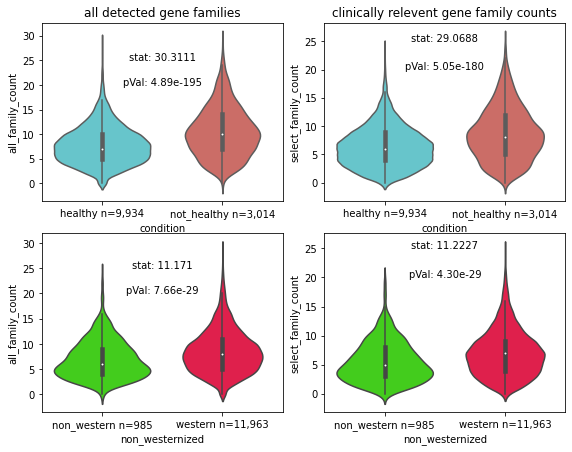

In [411]:
from scipy import stats

fig, ax = plt.subplots(2,2, figsize=(8,6))
plt.rcParams['svg.fonttype'] = 'none'
plt.tight_layout()

peeep=[sns.color_palette('hls',2)[1],sns.color_palette('hls',2)[0]]

t_test=stats.ttest_ind(renamed_counting_df[renamed_counting_df["condition"]=="not_healthy n=3,014"]["all_family_count"],
                       renamed_counting_df[renamed_counting_df["condition"]=="healthy n=9,934"]["all_family_count"]) 
sns.violinplot(data=renamed_counting_df, x="condition", y="all_family_count", ax=ax[0,0], palette=peeep)#, order=['not_healthy','healthy'])
ax[0,0].text(0.5,25, "stat: "+str(round(t_test[0], 4)), horizontalalignment='center')
ax[0,0].text(0.5,20, "pVal: "+str('{:0.2e}'.format(t_test[1])), horizontalalignment='center')
ax[0,0].set_title("all detected gene families")

t_test=stats.ttest_ind(renamed_counting_df[renamed_counting_df["non_westernized"]=="western n=11,963"]["all_family_count"],
                       renamed_counting_df[renamed_counting_df["non_westernized"]=="non_western n=985"]["all_family_count"])
sns.violinplot(data=renamed_counting_df, x="non_westernized", y="all_family_count", ax=ax[1,0], palette='prism')
ax[1,0].text(0.5,25, "stat: "+str(round(t_test[0], 4)), horizontalalignment='center')
ax[1,0].text(0.5,20, "pVal: "+str('{:0.2e}'.format(t_test[1], 4)), horizontalalignment='center')


t_test=stats.ttest_ind(renamed_counting_df[renamed_counting_df["condition"]=="not_healthy n=3,014"]["select_family_count"],
                       renamed_counting_df[renamed_counting_df["condition"]=="healthy n=9,934"]["select_family_count"])
sns.violinplot(data=renamed_counting_df, x="condition", y="select_family_count", ax=ax[0,1], palette=peeep)#, order=['not_healthy','healthy'])
ax[0,1].text(0.5,25, "stat: "+str(round(t_test[0], 4)), horizontalalignment='center')
ax[0,1].text(0.5,20, "pVal: "+str('{:0.2e}'.format(t_test[1], 4)), horizontalalignment='center')
ax[0,1].set_title("clinically relevent gene family counts")

t_test=stats.ttest_ind(renamed_counting_df[renamed_counting_df["non_westernized"]=="western n=11,963"]["select_family_count"],
                       renamed_counting_df[renamed_counting_df["non_westernized"]=="non_western n=985"]["select_family_count"]) 
sns.violinplot(data=renamed_counting_df, x="non_westernized", y="select_family_count", ax=ax[1,1], palette='prism')
ax[1,1].text(0.5,25, "stat: "+str(round(t_test[0], 4)), horizontalalignment='center')
ax[1,1].text(0.5,20, "pVal: "+str('{:0.2e}'.format(t_test[1], 4)), horizontalalignment='center')

#plt.savefig(OUT+"figures/sample_summary_figs/violin_family_count_health_and_western.svg")
plt.savefig(OUT+"figures/sample_summary_figs/violin_family_count_health_and_western.png")

### There are stitistical differences between healthy and unhealthy, as well as west and non-west
* But we didn;t control for either of these variables... they could be interdepentand... 

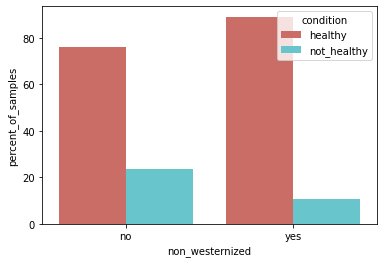

In [451]:
plt.rcParams['svg.fonttype'] = 'none'
plt.tight_layout()

totes=len(screened_sample_data)
health_west=group_and_count(screened_sample_data[screened_sample_data['body_site']=='stool'], ["non_westernized","condition"], "sample_count")
#health_west=health_west.sort_values('condition', ascending=False)
west_count=group_and_count(screened_sample_data[screened_sample_data['body_site']=='stool'], ["non_westernized"], "western_count")
health_west=pd.merge(left=health_west, right=west_count, on="non_westernized", how='left')
health_west["percent_of_samples"]=100*health_west["sample_count"]/health_west["western_count"]
#health_west["percent_samples"]=100*health_west["percent_samples"]/
sns.barplot(data=health_west, x="non_westernized", y="percent_of_samples", hue="condition", palette='hls')
plt.savefig(OUT+"figures/sample_summary_figs/bars_western_condition_splits.svg")
plt.savefig(OUT+"figures/sample_summary_figs/bars_western_condition_splits.png")

### Are there differences based on the body site?

In [397]:
counting_df.head(2)

,index,sample_id,body_site,non_westernized,condition,all_gene_count,select_gene_count,all_family_count,select_family_count,body_site_totals
0,0,A01_02_1FE,stool,yes,healthy,17.0,12.0,11.0,9.0,"stool n=14,479"
1,407,CA23,stool,no,not_healthy,10.0,5.0,6.0,5.0,"stool n=14,479"


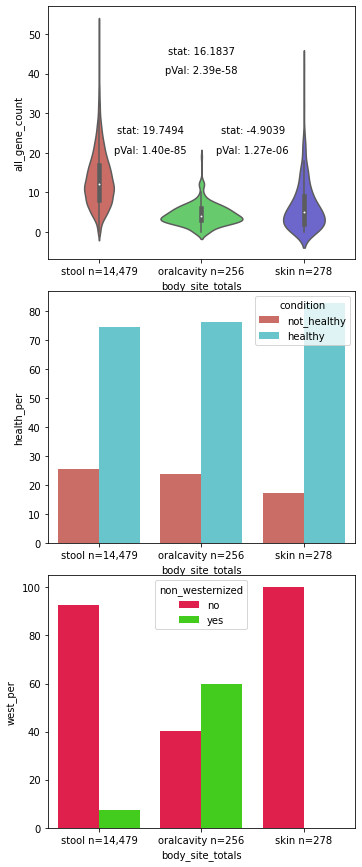

In [450]:
site_names={'stool':'stool n=14,479', 'oralcavity':'oralcavity n=256', 'skin':'skin n=278'}
test_type='all_gene_count'
st_oc=stats.ttest_ind(counting_df[counting_df["body_site"]=='stool']["all_gene_count"], counting_df[counting_df["body_site"]=='oralcavity'][test_type]) 
st_sk=stats.ttest_ind(counting_df[counting_df["body_site"]=='stool']["all_gene_count"], counting_df[counting_df["body_site"]=='skin'][test_type]) 
oc_sk=stats.ttest_ind(counting_df[counting_df["body_site"]=='oralcavity']["all_gene_count"], counting_df[counting_df["body_site"]=='skin'][test_type]) 
site_names={'stool':'stool n=14,479', 'oralcavity':'oralcavity n=256', 'skin':'skin n=278'}
counting_df['body_site_totals']=counting_df['body_site'].map(site_names)
#counting_df=counting_df.sort_values("body_site",ascending=False).reset_index(drop=True)

fig, ax = plt.subplots(3, figsize=(5,12))
plt.rcParams['svg.fonttype'] = 'none'
plt.tight_layout()

sns.violinplot(data=counting_df, x='body_site_totals', y='all_gene_count', palette='hls',  order=['stool n=14,479','oralcavity n=256','skin n=278'], ax=ax[0])
#left
ax[0].text(0.5,25, "stat: "+str(round(st_oc[0], 4)), horizontalalignment='center')
ax[0].text(0.5,20, "pVal: "+str('{:0.2e}'.format(st_oc[1])), horizontalalignment='center')
#right
ax[0].text(1.5,25, "stat: "+str(round(oc_sk[0], 4)), horizontalalignment='center')
ax[0].text(1.5,20, "pVal: "+str('{:0.2e}'.format(oc_sk[1])), horizontalalignment='center')
#middle
ax[0].text(1,45, "stat: "+str(round(st_sk[0], 4)), horizontalalignment='center')
ax[0].text(1,40, "pVal: "+str('{:0.2e}'.format(st_sk[1])), horizontalalignment='center')


totes=len(screened_sample_data)
site_names={'stool':'stool n=14,479', 'oralcavity':'oralcavity n=256', 'skin':'skin n=278'}
health_site=group_and_count(screened_sample_data, ['body_site',"condition"], "health_count")
health_site['site_totals']=health_site.groupby('body_site')["health_count"].transform('sum')
health_site['health_per']=100*health_site['health_count']/health_site['site_totals']
health_site['body_site_totals']=health_site['body_site'].map(site_names)
#health_site=health_site.sort_values("body_site",ascending=False).reset_index(drop=True)
sns.barplot(data=health_site, x="body_site_totals", y="health_per", hue='condition', palette='hls', 
            hue_order=['not_healthy','healthy'], order=['stool n=14,479','oralcavity n=256','skin n=278'], ax=ax[1])

west_site=group_and_count(screened_sample_data, ['body_site',"non_westernized"], "west_count")
west_site['site_totals']=west_site.groupby('body_site')["west_count"].transform('sum')
west_site['west_per']=100*west_site['west_count']/west_site['site_totals']
west_site['body_site_totals']=west_site['body_site'].map(site_names)
#west_site=west_site.sort_values("body_site",ascending=False).reset_index(drop=True)
sns.barplot(data=west_site, x="body_site_totals", y="west_per", hue='non_westernized', palette='prism_r', order=['stool n=14,479','oralcavity n=256','skin n=278'], ax=ax[2])
plt.savefig(OUT+"figures/sample_summary_figs/body_site_statistics.svg")
plt.savefig(OUT+"figures/sample_summary_figs/body_site_statistics.png")

## Does the number of reads or the number of genes in a family correlate with the prevelence of genes?
* Highest pearson coeficcient is 0.3103 with p-value of 9.35e-69

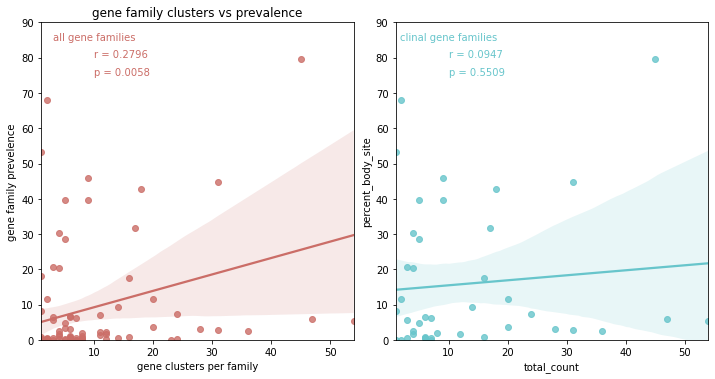

In [855]:
from scipy.stats.stats import pearsonr
fig, ax = plt.subplots(1,2, figsize=(10,5))
plt.rcParams['svg.fonttype'] = 'none'
plt.tight_layout()

colors=["#cb6d67","#67c5cb"]

### Plot for all the genes
rep_count_prev=pd.merge(left=all_genes_per_family, right=body_profile[body_profile['body_site']=='stool'], on="AMR Gene Family", how='inner')
rep_count_prev=rep_count_prev[rep_count_prev['display_name']!='OXA']
sns.regplot(data=rep_count_prev, y="percent_body_site", x="total_count", ax=ax[0], color=colors[0])
### calculate correlation
pearson=pearsonr(rep_count_prev["total_count"], rep_count_prev["percent_body_site"])
ax[0].text(10,85, "all gene families", horizontalalignment='center',color=colors[0])
ax[0].text(10,80, "r = "+str(round(pearson[0], 4)), horizontalalignment='left',color=colors[0])
ax[0].text(10,75, "p = "+str(round(pearson[1], 4)), horizontalalignment='left',color=colors[0])

### now overlay the selected genes
rep_count_prev=pd.merge(left=all_genes_per_family, right=body_profile[body_profile['body_site']=='stool'], on="AMR Gene Family", how='inner')
rep_count_prev=rep_count_prev[rep_count_prev['display_name']!='OXA']
rep_count_prev=rep_count_prev[rep_count_prev['display_name'].isin(selected_gene_fams['display_name'])]
sns.regplot(data=rep_count_prev, y="percent_body_site", x="total_count", ax=ax[1], color=colors[1])
### calculate the correlation 
pearson=pearsonr(rep_count_prev["total_count"], rep_count_prev["percent_body_site"])
ax[0].set_ylim(0,90)
ax[0].set_title("gene family clusters vs prevalence")
ax[0].set_xlabel("gene clusters per family")
ax[0].set_ylabel("gene family prevelence")
ax[1].set_ylim(0,90)
ax[1].text(10,85, "clinal gene families", horizontalalignment='center',color=colors[1])
ax[1].text(10,80, "r = "+str(round(pearson[0], 4)), horizontalalignment='left', color=colors[1])
ax[1].text(10,75, "p = "+str(round(pearson[1], 4)), horizontalalignment='left', color=colors[1])

#plt.savefig(OUT+"figures/sample_summary_figs/gene_clusters_vs_prevelence.svg")
plt.savefig(OUT+"figures/sample_summary_figs/gene_clusters_vs_prevelence.png")

## How should I filter the results?
* The most important value is the template identity
* Filtering by identity seems to also remove all low coverag reads
* p_value has a very small effect compared to Template Identity
* selected parameters: min template ID=90, min coverage=80, max p-value=0.0001

In [86]:
all_kma_data.head(2)

,study_name,sample_id,#Template,Score,Expected,Template_length,Template_Identity,Template_Coverage,Query_Identity,Query_Coverage,Depth,q_value,p_value,ARO Accession
0,PehrssonE_2016,SID010101,gb|AF028812.1|+|392-887|ARO:3002867|dfrF [Ente...,3004,118,495,100.00,100.00,100.00,100.00,6.18,2665.99,1.000000e-26,ARO:3002867
1,PehrssonE_2016,SID010101,gb|BA000007.3|-|4903688-4905062|ARO:3000830|cp...,411,330,1374,27.15,27.51,98.68,363.49,0.31,8.79,3.000000e-03,ARO:3000830


In [259]:
# map the aro representatives to each ARO hit
filter_kma=all_kma_data.copy()
filter_kma["ARO Accession"]=filter_kma["#Template"].str.split("|").str[4]
filter_kma["aro_rep"]=filter_kma["ARO Accession"].map(aro_map)
# remove the ones without an ARO which come from the e-pilli screen
filter_kma=filter_kma[~filter_kma["aro_rep"].isna()]
select_fam_list=selected_gene_fams["AMR Gene Family"].to_list()

filter_kma=filter_kma.sort_values("Score", ascending=False)
filter_kma=filter_kma.drop_duplicates(["study_name","sample_id","aro_rep"])
filter_kma=filter_kma.drop(["#Template","ARO Accession"], axis=1).rename({"aro_rep":"ARO Accession"}, axis=1)

card_info=card_index[["ARO Accession","ARO Name","AMR Gene Family","Drug Class","Resistance Mechanism"]]
card_info=card_info.drop_duplicates(["ARO Accession","ARO Name","AMR Gene Family"]) ## there is 5 duplicatte ARO numbers but they are the same and can just be dropped
filter_kma=pd.merge(filter_kma, card_info, on="ARO Accession", how='inner')
filter_kma=filter_kma[filter_kma["AMR Gene Family"].isin(select_fam_list)]
filter_kma.head(2)

,study_name,sample_id,Score,Expected,Template_length,Template_Identity,Template_Coverage,Query_Identity,Query_Coverage,Depth,q_value,p_value,ARO Accession,ARO Name,AMR Gene Family,Drug Class,Resistance Mechanism
14114,WampachL_2018,V2_C101,22978784,4105,735,99.86,100.0,99.86,100.0,31446.34,22966470.09,1.000000e-26,ARO:3000250,ErmC,Erm 23S ribosomal RNA methyltransferase,lincosamide antibiotic;macrolide antibiotic;st...,antibiotic target alteration
14115,ShaoY_2019,a978aa5a-7ae6-11e9-a106-68b59976a384,10535550,3171,735,99.46,100.0,99.46,100.0,14596.99,10526038.40,1.000000e-26,ARO:3000250,ErmC,Erm 23S ribosomal RNA methyltransferase,lincosamide antibiotic;macrolide antibiotic;st...,antibiotic target alteration


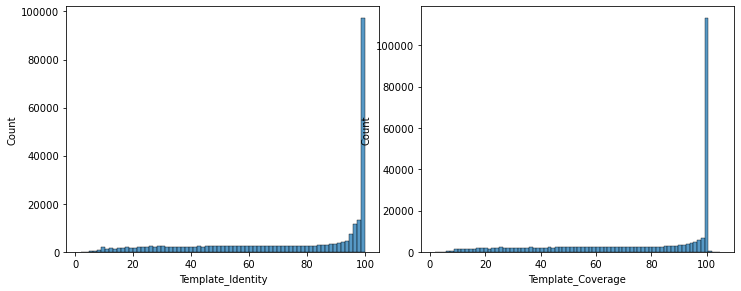

In [267]:
plot_list=["Template_Identity","Template_Coverage"]#,"Depth","q_value","p_value"]
#plot_list=["Template_Identity","Template_Coverage","Query_Identity","Query_Coverage"]#,"Depth","q_value","p_value"]
fig, ax = plt.subplots(1,len(plot_list), figsize=(10,4))
plt.rcParams['svg.fonttype'] = 'none'
plt.tight_layout()
for i in range(len(plot_list)):
    sns.histplot(data=filter_kma, x=plot_list[i], ax=ax[i])
plt.savefig(OUT+"figures/filtering_figs/id_and_cov_histograms.svg")

In [271]:
min_cov_vals=[0,20,30,40,50,60,70,80,90,100]
min_ID_vals=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,97,100]

output=[]
for min_ID in min_ID_vals:
    this_level=[]
    for min_cov in min_cov_vals:
        result=len(filter_kma[(filter_kma["Template_Identity"]>=min_ID) & (filter_kma["Template_Coverage"]>=min_cov)])
        this_level.append(result)
    output.append(this_level)
        
out_df=pd.DataFrame(output, index=min_ID_vals, columns=min_cov_vals)        

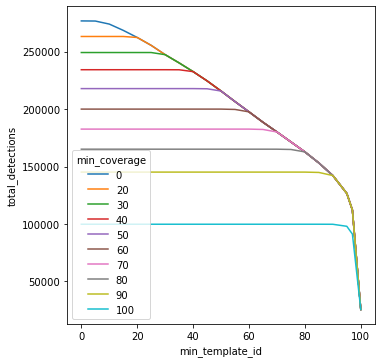

In [272]:
fig, ax = plt.subplots(figsize=(5,5))
plt.rcParams['svg.fonttype'] = 'none'
plt.tight_layout()

mlt=pd.melt(out_df.reset_index().rename({"index":"min_template_id"},axis=1), id_vars="min_template_id", value_vars=min_cov_vals, value_name="total_detections", var_name="min_coverage")
mlt["min_coverage"]=mlt["min_coverage"].astype(str)
sns.lineplot(data=mlt, x="min_template_id",y="total_detections",hue="min_coverage")
plt.savefig(OUT+"figures/filtering_figs/id_and_cov_filter_lineplot.svg")

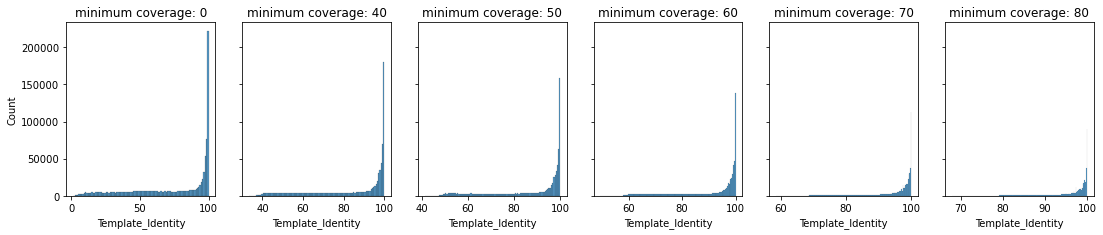

In [222]:
fig, ax = plt.subplots(1,len(min_cov), figsize=(15,3),sharey='row')
plt.rcParams['svg.fonttype'] = 'none'
plt.tight_layout()

In [266]:
print(len(filter_kma))
beeb=filter_kma[filter_kma["Template_Identity"]>=90]
print(len(beeb))
beeb=beeb[beeb["Template_Coverage"]>=80]
print(len(beeb))
beeb=beeb[beeb["p_value"]<=0.0001]
print(len(beeb))

276692
142166
142166
141139


<AxesSubplot:xlabel='Template_ID', ylabel='total_detections'>

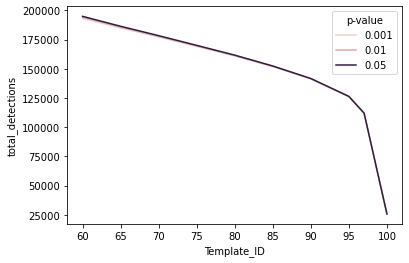

In [177]:
out_df=pd.DataFrame(output, index=ID_vals, columns=p_vals)
mlt=pd.melt(out_df.reset_index().rename({"index":"Template_ID"},axis=1), id_vars="Template_ID", value_vars=p_vals, value_name="total_detections", var_name="p-value")
sns.lineplot(data=mlt, x="Template_ID",y="total_detections",hue="p-value")

<AxesSubplot:xlabel='index', ylabel='0.01'>

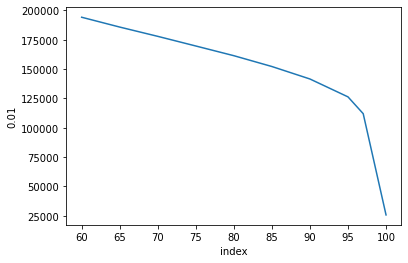

In [166]:
sns.lineplot(data=out_df.reset_index(), x="index", y=0.01)

In [ ]:
sns.lineplot(out_df)

In [144]:
selected_gene_fams=pd.read_csv(OUT+"metadata/selected_gene_fams_V1.txt", sep='\t')
select_fam_list=selected_gene_fams["AMR Gene Family"].to_list()

In [148]:
collapse_kma_data.shape

(543709, 17)

In [146]:
collapse_kma_data[collapse_kma_data["AMR Gene Family"].isin(select_fam_list)].shape

(160696, 17)

In [354]:
honduras_kma=collapse_kma_data[collapse_kma_data["study_name"]=="Princeton_2022"]
patho_fams=["CTX-M beta-lactamase","quinolone resistance protein (qnr)","AAC(6')"]
commensal_fams=["CfxA beta-lactamase","CfiA beta-lactamase","CepA beta-lactamase","CblA beta-lactamase"]
hond_patho=honduras_kma[honduras_kma["AMR Gene Family"].isin(patho_fams)]
hond_patho["dummy"]=1
exact_patho=["QnrS6","QnrS8","AAC(6')-Ib7","AAC(6')-Ib8","CTX-M-130","CTX-M-132","CTX-M-211","CTX-M-56","CTX-M-74","CTX-M-78"]
hond_patho=hond_patho[hond_patho["ARO Name"].isin(exact_patho)]
hond_patho.pivot_table(index="sample_id", columns="ARO Name", values="dummy").fillna(0).to_csv(OUT+"honduras_check/patho_genes.txt", sep='\t')

/home/pd378/miniconda3/envs/jupyter2/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [902]:
collapse_kma_data[collapse_kma_data["ARO Name"]=="OXA-199"]

,study_name,sample_id,Score,Expected,Template_length,Template_Identity,Template_Coverage,Query_Identity,Query_Coverage,Depth,q_value,p_value,ARO Accession,ARO Name,AMR Gene Family,Drug Class,Resistance Mechanism
471513,ShaoY_2019,b3267ec4-7ae6-11e9-a106-68b59976a384,53749,3853,798,100.0,100.0,100.0,100.0,67.45,43218.78,1.000000e-26,ARO:3001814,OXA-199,OXA beta-lactamase,carbapenem;cephalosporin;penam,antibiotic inactivation
471514,Princeton_2022,073-0114-05,12125,2078,798,100.0,100.0,100.0,100.0,15.21,7106.08,1.000000e-26,ARO:3001814,OXA-199,OXA beta-lactamase,carbapenem;cephalosporin;penam,antibiotic inactivation
471515,ShaoY_2019,b316b2fa-7ae6-11e9-a106-68b59976a384,11369,467,798,100.0,100.0,100.0,100.0,14.27,10040.50,1.000000e-26,ARO:3001814,OXA-199,OXA beta-lactamase,carbapenem;cephalosporin;penam,antibiotic inactivation
471516,AsnicarF_2021,SAMEA7045089,8179,363,798,100.0,100.0,100.0,100.0,10.33,7151.34,1.000000e-26,ARO:3001814,OXA-199,OXA beta-lactamase,carbapenem;cephalosporin;penam,antibiotic inactivation
471517,OhJ_2014,MET0282,6976,166,798,100.0,100.0,100.0,100.0,8.83,6491.35,1.000000e-26,ARO:3001814,OXA-199,OXA beta-lactamase,carbapenem;cephalosporin;penam,antibiotic inactivation
